# Business Understanding
- The company is diversifying its portfolio by entering the aviation industry, aiming to purchase and operate airplanes for both commercial and private use. To support this expansion, it is critical to assess the risks associated with different aircraft. The objective is to identify the aircraft models and manufacturers with the lowest risks, analyze factors contributing to accidents, and provide actionable insights to guide the aviation division's purchasing decisions.

# Objectives:

1. To identify aircraft make and models with the **lowest** accident risks.
2. Analyze trends in aviation accidents to understand risk changes for specific aircraft models over time.
3. Assess operational factors affecting accident risks for different aircraft models to improve safety decisions.
    

# Import Libraries 

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.io as pio

pio.renderers.default = "svg"

# Display all columns(max of 50 columns: this number is abitrary)
pd.set_option("display.max_columns", 50)

In [2]:
# Import dataset 
df = pd.read_csv(r"/home/western/Documents/Data/AviationData.csv", encoding='latin1', low_memory=False)
df.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
0          NaN        Fatal(2)       Destroyed               NaN   
1          NaN        Fatal(4)       Destroyed               NaN   
2          NaN        Fatal(3)       Destroyed               NaN   
3          NaN        Fatal(2)       Destroyed               NaN   
4          NaN        Fatal(1)       Destroyed               NaN   

  Registration.Number      Make     Model Amateur.Built  Number.of.Engines  \
0              NC6404   Stinson     108-3            No                1.0   
1              N5069P     Piper  PA24-180            No                1.0   
2              N5142R    Cessna      172M            No                1.0   
3              N1168J  Rockwell       112            No                1.0   
4               N15NY    Cessna       501            No                NaN   

     Engine.Type FAR.Description Schedule Purpose.of.flight Air.carrier  \
0  Reciprocating             NaN      NaN          Personal         NaN   
1  Reciprocating             NaN      NaN          Personal         NaN   
2  Reciprocating             NaN      NaN          Personal         NaN   
3  Reciprocating             NaN      NaN          Personal         NaN   
4            NaN             NaN      NaN          Personal         NaN   

   Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
0                   2.0                     0.0                   0.0   
1                   4.0                     0.0                   0.0   
2                   3.0                     NaN                   NaN   
3                   2.0                     0.0                   0.0   
4                   1.0                     2.0                   NaN   

   Total.Uninjured Weather.Condition Broad.phase.of.flight   Report.Status  \
0              0.0               UNK                Cruise  Probable Cause   
1              0.0               UNK               Unknown  Probable Cause   
2              NaN               IMC                Cruise  Probable Cause   
3              0.0               IMC                Cruise  Probable Cause   
4              0.0               VMC              Approach  Probable Cause   

  Publication.Date  
0              NaN  
1       19-09-1996  
2       26-02-2007  
3       12-09-2000  
4       16-04-1980

## Dataframe info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Subset to only work with top aircrafts 
- Only work with top 15 most used airplanes 

In [4]:
# Find the top 15 most common airplane makes
top_makes = df['Make'].value_counts().head(15).index
top_makes

# Filter the DataFrame to only include rows with these top makes
df = df[df['Make'].isin(top_makes)]



## Subset to work with selected rows
- Select the top 100 countries with airplane accidents and incidents 

In [5]:
# Get the top 100 countries by accident and incident 
top_countries = df['Country'].value_counts().index[:100]

# Filter to only include rows where country is in top 100 list  
df = df[df['Country'].isin(top_countries)]

# Remove rows where country is blank
df = df[df['Country'].notna() & df['Country'].str.strip() !=""]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 57322 entries, 1 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                57322 non-null  object 
 1   Investigation.Type      57322 non-null  object 
 2   Accident.Number         57322 non-null  object 
 3   Event.Date              57322 non-null  object 
 4   Location                57294 non-null  object 
 5   Country                 57322 non-null  object 
 6   Latitude                18450 non-null  object 
 7   Longitude               18447 non-null  object 
 8   Airport.Code            33250 non-null  object 
 9   Airport.Name            35079 non-null  object 
 10  Injury.Severity         56757 non-null  object 
 11  Aircraft.damage         55731 non-null  object 
 12  Aircraft.Category       17380 non-null  object 
 13  Registration.Number     56469 non-null  object 
 14  Make                    57322 non-null  obj

# Data Cleaning 

### Check for duplicates 

In [6]:
df.duplicated().sum()


0

#### **Key Observations**
    1. There are no duplicated rows in the dataframe

### Parse correct dtypes


In [7]:
# Convert Event.Date to a datetime format

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce', dayfirst=False)


## Checking for Null values 
- The dataset had missing values


In [8]:
# Missing values 
missing_entries = df.isnull().sum()

# Calculate percentages 
percent_missing_records = (missing_entries / len(df)) * 100

missing_records_df = pd.DataFrame({
    'missing_entries': missing_entries,
    'percentage (%)': percent_missing_records
})

missing_records_df[:]

missing_entries  percentage (%)
Event.Id                              0        0.000000
Investigation.Type                    0        0.000000
Accident.Number                       0        0.000000
Event.Date                            0        0.000000
Location                             28        0.048847
Country                               0        0.000000
Latitude                          38872       67.813405
Longitude                         38875       67.818639
Airport.Code                      24072       41.994348
Airport.Name                      22243       38.803601
Injury.Severity                     565        0.985660
Aircraft.damage                    1591        2.775549
Aircraft.Category                 39942       69.680053
Registration.Number                 853        1.488085
Make                                  0        0.000000
Model                                12        0.020934
Amateur.Built                        61        0.106416
Number.of.Engines                  2975        5.189979
Engine.Type                        3438        5.997697
FAR.Description                   40031       69.835316
Schedule                          49981       87.193399
Purpose.of.flight                  3227        5.629601
Air.carrier                       48759       85.061582
Total.Fatal.Injuries               7332       12.790901
Total.Serious.Injuries             8154       14.224905
Total.Minor.Injuries               7711       13.452078
Total.Uninjured                    3543        6.180873
Weather.Condition                  2349        4.097903
Broad.phase.of.flight             13639       23.793657
Report.Status                      3182        5.551097
Publication.Date                  10038       17.511601

### Dropping columns
- Dropped all columns with missing values greater than 60%. Imputing these columns would result in data skewness.
- Some columns are irrelavant within the confines of the objectives and were dropped
- Drop location and use country instead

In [9]:
# Drop columns 
df = df.drop(columns=['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description',
                      'Schedule', 'Air.carrier', 'Airport.Code', 'Airport.Name', 
                      'Publication.Date', 'Registration.Number', 'Report.Status', 'Location' 
                     ], errors='ignore')


## Imputation 
- Impute missing values based on probability distribution of existing categories or columns 
- This preserves variability of the data unlike deterministic methods reducing bias in downstream analysis 
- For numeric variables, missing values are sampled from distribution of observed data 
- For categorical variables, missing values are sampled based on observed frequency distribution
- Use random state to ensure reproducibility 


### Imputation of categorical columns 

In [10]:

# List of categorical columns for imputation (removing duplicate 'Broad.phase.of.flight')
categorical_columns = [
    'Aircraft.damage', 'Engine.Type', 'Purpose.of.flight', 
    'Weather.Condition', 'Broad.phase.of.flight',
    'Make', 'Model', 'Amateur.Built'
]


def probabilistic_categorical_imputation(series, prob_dist, random_state=None):
    # Set the random state for reproducibility
    rng = np.random.default_rng(random_state)
    
    # Ensure the probability distribution sums to 1
    prob_dist = prob_dist / prob_dist.sum()
    
    # Identify missing values
    missing_indices = series[series.isna()].index
    
    # Sample replacement values based on the probability distribution
    sampled_values = rng.choice(prob_dist.index, size=len(missing_indices), p=prob_dist.values)
    
    # Create a copy of the series and update missing values
    series = series.copy()  # Avoid working on a slice directly
    series.loc[missing_indices] = sampled_values
    
    return series


# Perform probabilistic imputation on each column
for column in categorical_columns:
    # Calculate the probability distribution of non-missing values
    prob_distribution = df[column].value_counts(normalize=True)
    
    # Impute missing values using the probabilistic imputation function
    df[column] = probabilistic_categorical_imputation(df[column], prob_distribution, random_state=42)




In [11]:
# Missing values 
missing_entries = df.isnull().sum()

# Calculate percentages 
percent_missing_records = (missing_entries / len(df)) * 100

missing_records_df = pd.DataFrame({
    'missing_entries': missing_entries,
    'percentage (%)': percent_missing_records
})

missing_records_df[:]

missing_entries  percentage (%)
Event.Id                              0        0.000000
Investigation.Type                    0        0.000000
Accident.Number                       0        0.000000
Event.Date                            0        0.000000
Country                               0        0.000000
Injury.Severity                     565        0.985660
Aircraft.damage                       0        0.000000
Make                                  0        0.000000
Model                                 0        0.000000
Amateur.Built                         0        0.000000
Number.of.Engines                  2975        5.189979
Engine.Type                           0        0.000000
Purpose.of.flight                     0        0.000000
Total.Fatal.Injuries               7332       12.790901
Total.Serious.Injuries             8154       14.224905
Total.Minor.Injuries               7711       13.452078
Total.Uninjured                    3543        6.180873
Weather.Condition                     0        0.000000
Broad.phase.of.flight                 0        0.000000

### Imputing numerical columns

In [12]:
# List of numeric columns for imputation
numeric_columns = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]

# Function for probabilistic imputation on numeric columns
def probabilistic_numeric_imputation(series, random_state=None):
    # Set random state for reproducibility
    rng = np.random.default_rng(random_state)
    
    # Remove NaNs and get existing values
    existing_values = series.dropna().values
    
    # Identify missing values
    missing_indices = series[series.isna()].index
    
    # Sample replacement values from existing values
    sampled_values = rng.choice(existing_values, size=len(missing_indices))
    
    # Create a copy of the series and update missing values
    series = series.copy()
    series.loc[missing_indices] = sampled_values
    
    return series

# Apply probabilistic imputation on numeric columns
for column in numeric_columns:
    df[column] = probabilistic_numeric_imputation(df[column], random_state=42)

# Check the result
print(df.isna().sum())  # Should show 0 for the specified numeric columns if all missing values are imputed



Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Country                     0
Injury.Severity           565
Aircraft.damage             0
Make                        0
Model                       0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Broad.phase.of.flight       0
dtype: int64


In [13]:
df.describe()

Event.Date  Number.of.Engines  Total.Fatal.Injuries  \
count                          57322       57322.000000          57322.000000   
mean   1997-11-02 23:36:42.756358656           1.153292              0.601183   
min              1962-07-19 00:00:00           0.000000              0.000000   
25%              1987-10-23 00:00:00           1.000000              0.000000   
50%              1995-11-01 00:00:00           1.000000              0.000000   
75%              2006-03-16 18:00:00           1.000000              0.000000   
max              2022-12-29 00:00:00           4.000000            349.000000   
std                              NaN           0.418223              4.881030   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  
count            57322.000000          57322.000000     57322.000000  
mean                 0.255207              0.339713         5.013729  
min                  0.000000              0.000000         0.000000  
25%                  0.000000              0.000000         0.000000  
50%                  0.000000              0.000000         1.000000  
75%                  0.000000              0.000000         2.000000  
max                161.000000            380.000000       699.000000  
std                  1.499647              2.116229        27.597089

### Cleaning values in different columns  

In [14]:
# Replace values in 'Weather.Condition', 'Engine.Type'

df['Weather.Condition'] = df['Weather.Condition'].replace(to_replace=['UNK', 'Unk'], value='Unknown', regex=False)
df['Engine.Type'] = df['Engine.Type'].replace(to_replace=['UNK', 'Unk', 'NONE'], value='Unknown', regex=False)

# Capitalize the first letter of each word in the 'Make' column
df['Make'] = df['Make'].str.title()


In [15]:
# Ensure 'Total.Fatal.Injuries' is 0 where 'Injury.Severity' is 'Non-Fatal'
df.loc[df['Injury.Severity'] == 'Non-Fatal', 'Total.Fatal.Injuries'] = 0

# Drop the 'Injury.Severity' column
df = df.drop(columns=['Injury.Severity'])

# Feature Engineering 
- Adding new columns to enhance exploratory data analysis 

### Combine make and model to create a new column 



In [16]:
df['make_model'] = df['Make'].str.strip() + '-' + df['Model'].str.strip()

### Create seasons columns 
- Create season categories e.g winter, spring, etc
- This helps identify trends over time such as seasonal variations in accident rates 

In [17]:
# Create a function to categorize seasons 
def get_seasons(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
        
    else:
        return 'Autum'
    
# Apply function 
df['Season'] = df['Event.Date'].apply(get_seasons)

### Damage severity index
- Represents a numerical encoding of the aircraft damage levels to quantify the severity of aircraft damage. Each category of damage is mapped to a severity score based on its impact.

In [18]:
# Create dictionary to map aircraft damage 
damage_severity = {
    'Destroyed': 3,
    'Substantial': 4,
    'Minor': 2,
    'Unknown': 1,
}

# Apply mapping 
df['aircraft_damage_severity'] = df['Aircraft.damage'].map(damage_severity)

### Injury severity index
- This is a composite numerical feature designed to quantify the overall severity of injuries in aviation accidents. It is calculated as a weighted sum of different types of injuries

In [19]:
# Injury severity 

df['injury_severity_index'] = (
    (df['Total.Fatal.Injuries'] * 3) +
    (df['Total.Serious.Injuries'] * 2) + 
    (df['Total.Minor.Injuries'] * 1)
)

### Fatality rate
- The fatality_rate column represents the proportion of fatalities relative to the total number of people involved in each aviation event. It is calculated by dividing the number of fatal injuries by the total people involved (including fatalities, injuries, and uninjured individuals).

In [20]:
# Calculate total people involved in each event
df['total_people_involved'] = (
    df['Total.Fatal.Injuries'] +
    df['Total.Serious.Injuries'] +
    df['Total.Minor.Injuries'] +
    df['Total.Uninjured']
)

# Calculate fatality rate
df['fatality_rate'] = (df['Total.Fatal.Injuries'] / df['total_people_involved']) * 100


# Fill any NaN (e.g., division by zero if no people involved) with 0
df['fatality_rate'] = df['fatality_rate'].fillna(0)


# Survival Rate 

In [21]:
# Calculate total survivors
df['total_survivors'] = df['total_people_involved'] - df['Total.Fatal.Injuries']

# Calculate survival rate
df['survival_rate'] = (df['total_survivors'] / df['total_people_involved']) * 100

# Handle cases where total_people_involved is zero (if any)
df['survival_rate'] = df['survival_rate'].fillna(0)  # Assign 0% for missing data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57322 entries, 1 to 88888
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Event.Id                  57322 non-null  object        
 1   Investigation.Type        57322 non-null  object        
 2   Accident.Number           57322 non-null  object        
 3   Event.Date                57322 non-null  datetime64[ns]
 4   Country                   57322 non-null  object        
 5   Aircraft.damage           57322 non-null  object        
 6   Make                      57322 non-null  object        
 7   Model                     57322 non-null  object        
 8   Amateur.Built             57322 non-null  object        
 9   Number.of.Engines         57322 non-null  float64       
 10  Engine.Type               57322 non-null  object        
 11  Purpose.of.flight         57322 non-null  object        
 12  Total.Fatal.Injuries   

In [23]:
df.head()

Event.Id Investigation.Type Accident.Number Event.Date  \
1  20001218X45447           Accident      LAX94LA336 1962-07-19   
2  20061025X01555           Accident      NYC07LA005 1974-08-30   
4  20041105X01764           Accident      CHI79FA064 1979-08-02   
6  20001218X45446           Accident      CHI81LA106 1981-08-01   
7  20020909X01562           Accident      SEA82DA022 1982-01-01   

         Country Aircraft.damage    Make     Model Amateur.Built  \
1  United States       Destroyed   Piper  PA24-180            No   
2  United States       Destroyed  Cessna      172M            No   
4  United States       Destroyed  Cessna       501            No   
6  United States       Destroyed  Cessna       180            No   
7  United States     Substantial  Cessna       140            No   

   Number.of.Engines    Engine.Type Purpose.of.flight  Total.Fatal.Injuries  \
1                1.0  Reciprocating          Personal                   4.0   
2                1.0  Reciprocating          Personal                   3.0   
4                1.0  Reciprocating          Personal                   1.0   
6                1.0  Reciprocating          Personal                   4.0   
7                1.0  Reciprocating          Personal                   0.0   

   Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
1                     0.0                   0.0              0.0   
2                     0.0                   1.0              1.0   
4                     2.0                   0.0              0.0   
6                     0.0                   0.0              0.0   
7                     0.0                   0.0              2.0   

  Weather.Condition Broad.phase.of.flight      make_model  Season  \
1           Unknown               Unknown  Piper-PA24-180  Summer   
2               IMC                Cruise     Cessna-172M  Summer   
4               VMC              Approach      Cessna-501  Summer   
6               IMC               Unknown      Cessna-180  Summer   
7               VMC               Takeoff      Cessna-140  Winter   

   aircraft_damage_severity  injury_severity_index  total_people_involved  \
1                         3                   12.0                    4.0   
2                         3                   10.0                    5.0   
4                         3                    7.0                    3.0   
6                         3                   12.0                    4.0   
7                         4                    0.0                    2.0   

   fatality_rate  total_survivors  survival_rate  
1     100.000000              0.0       0.000000  
2      60.000000              2.0      40.000000  
4      33.333333              2.0      66.666667  
6     100.000000              0.0       0.000000  
7       0.000000              2.0     100.000000

In [24]:
# Convert column names in the DataFrame to lowercase and replace '.' with '_'
df.columns = [col.lower().replace('.', '_') for col in df.columns]


## Overal Data Distribution for numeric columns 

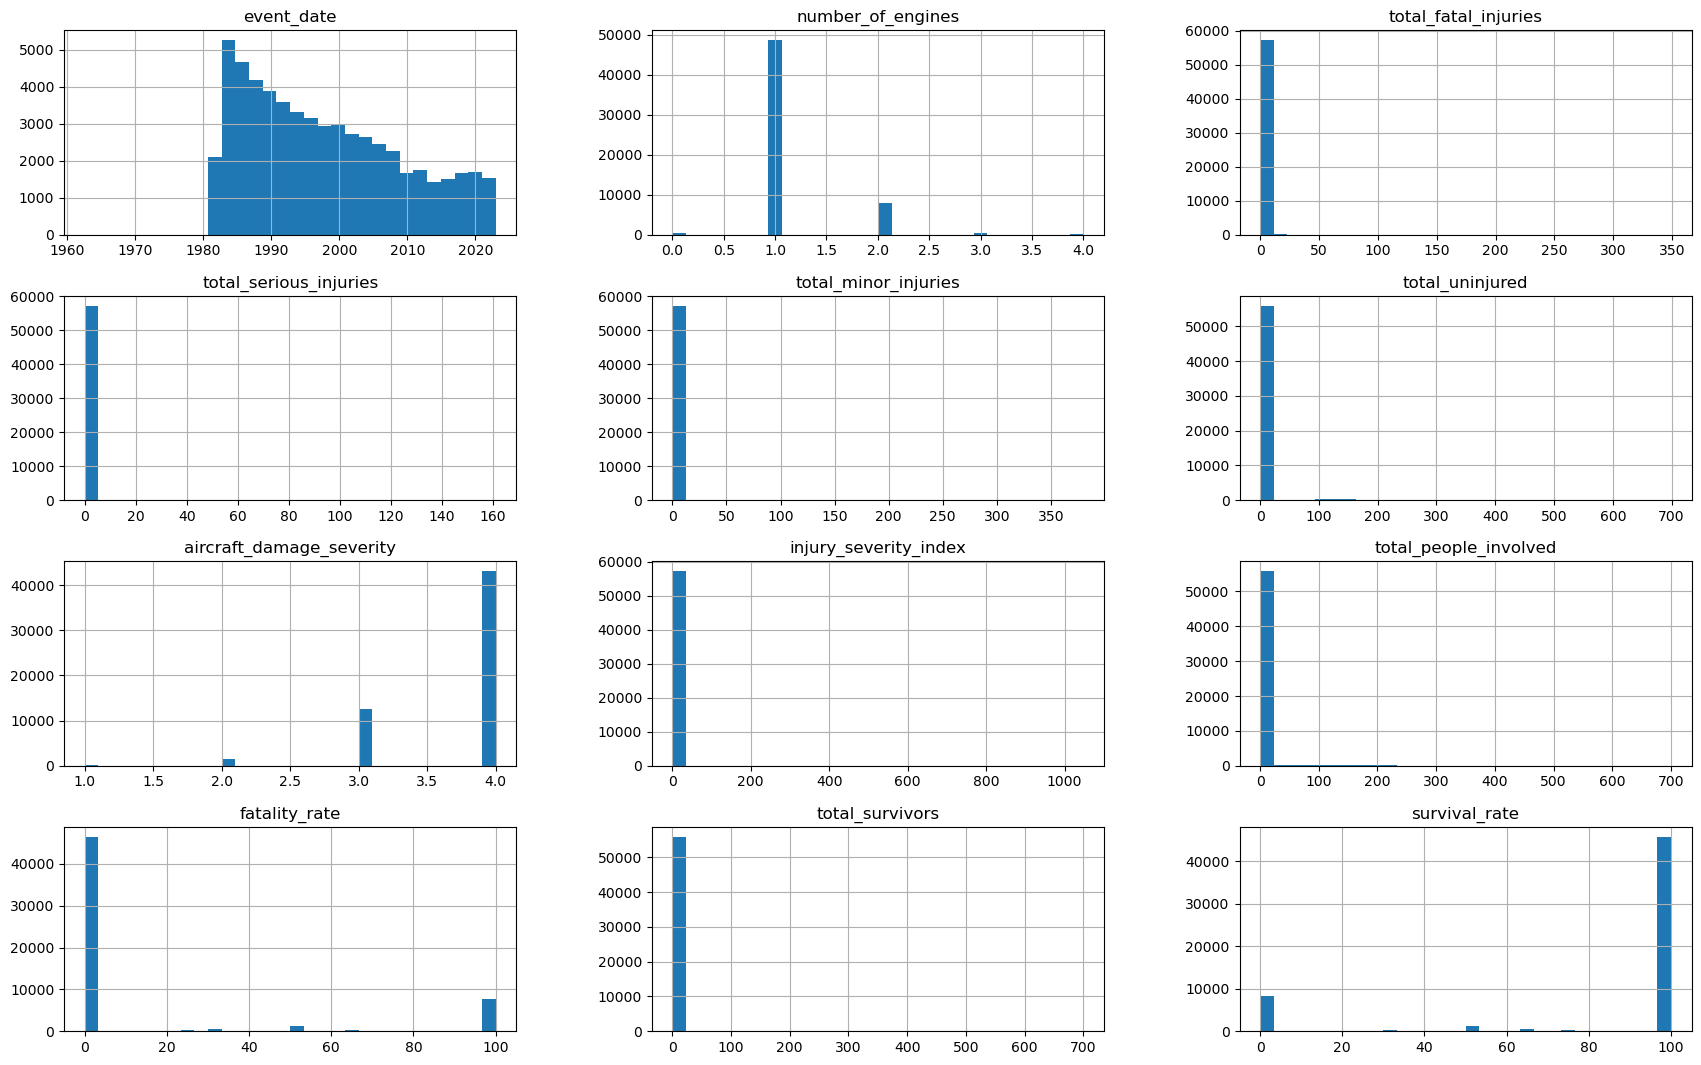

In [25]:
df.hist(bins=30, figsize=(21,13));

#### Key observations
- Data distribution in numeric columns is assymatic

## Outlier Determination 

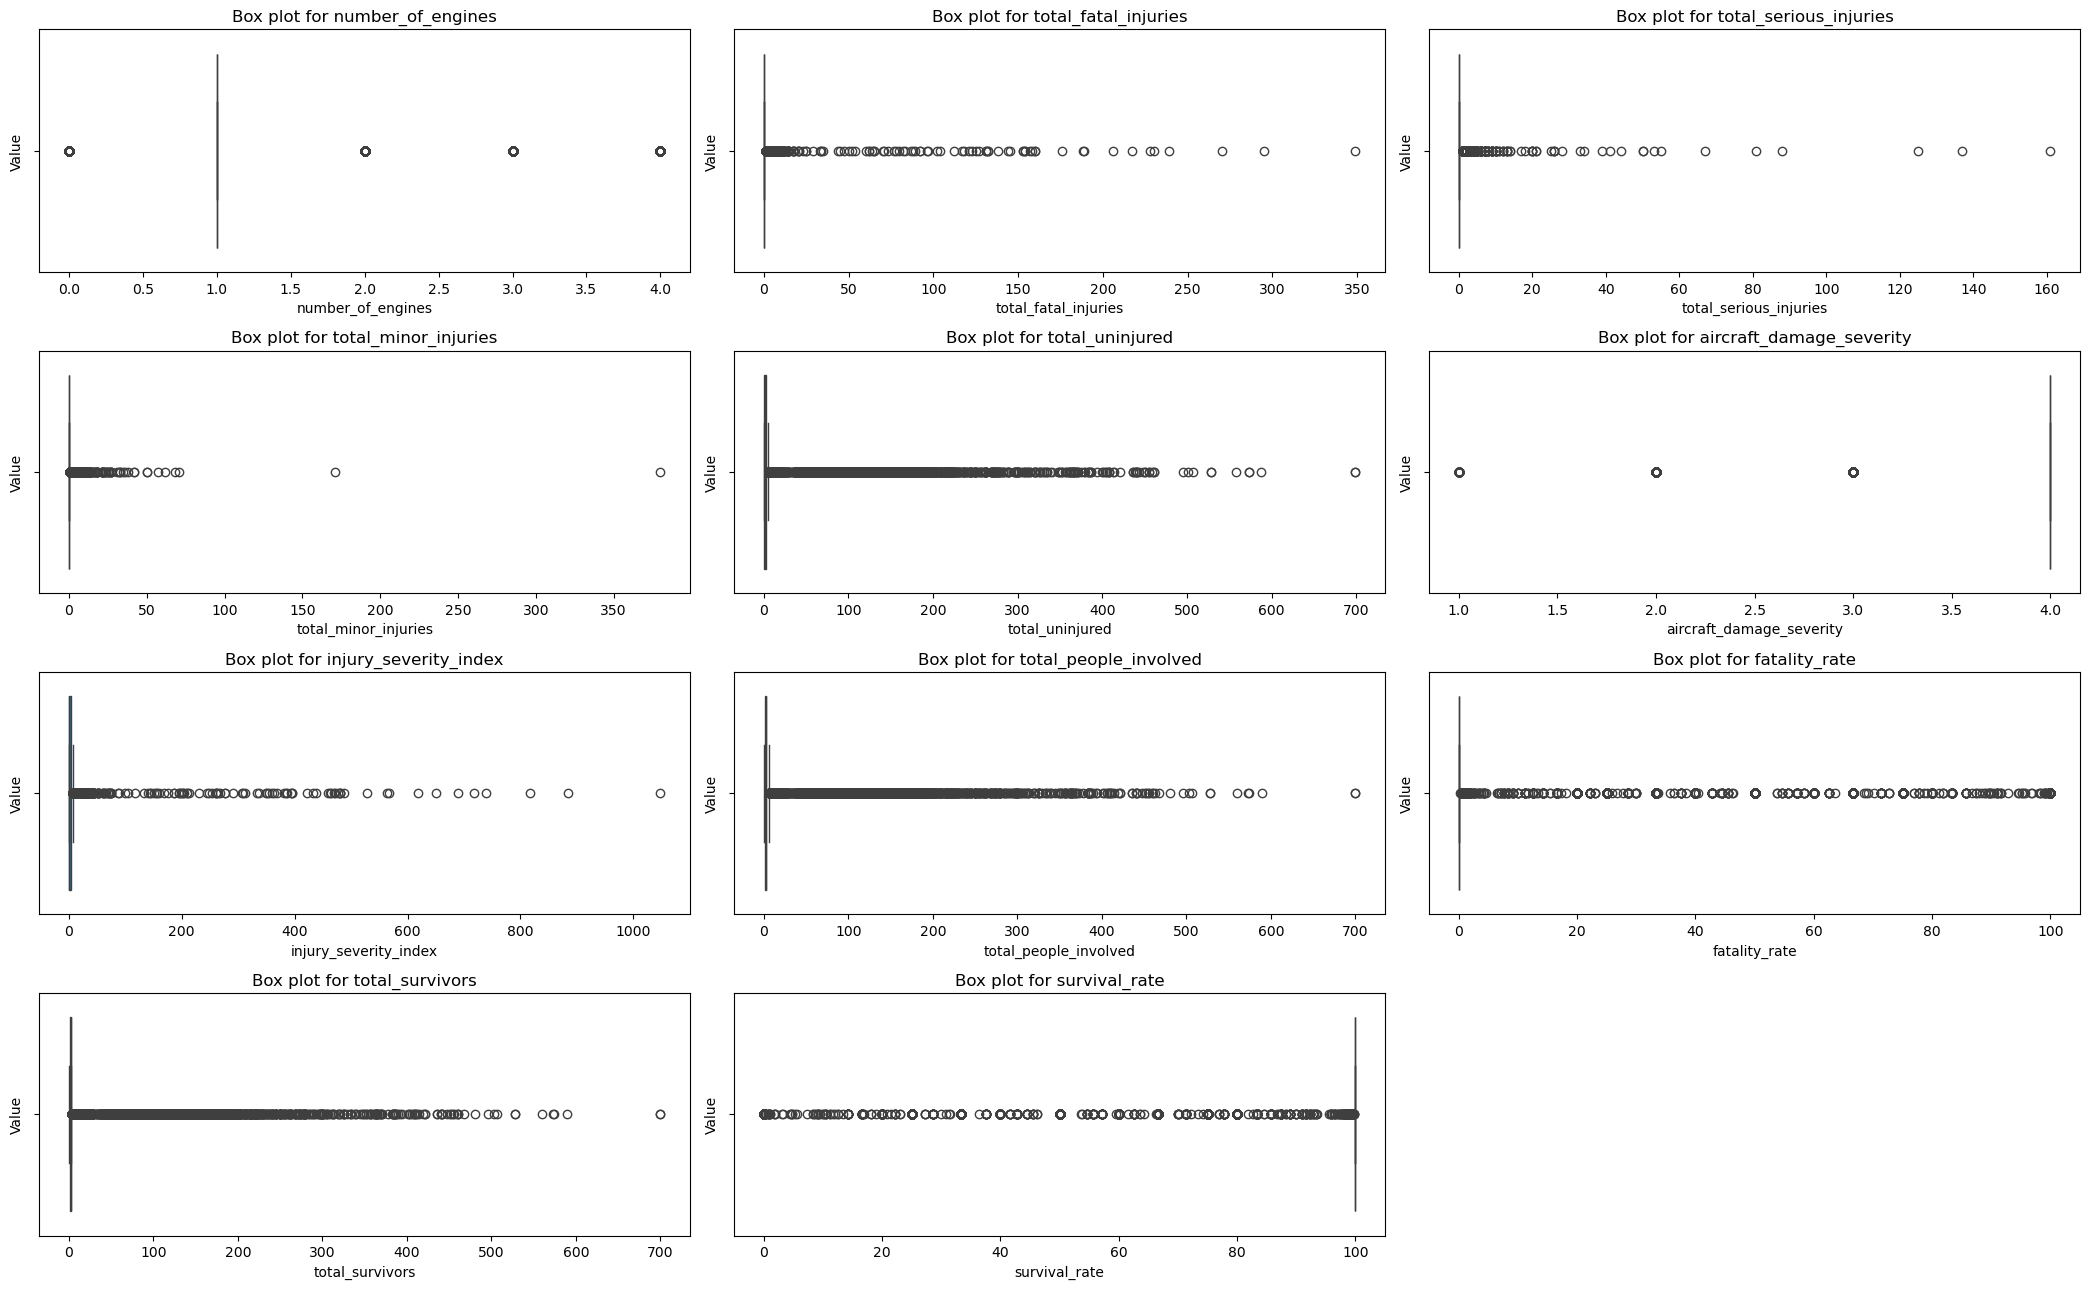

In [26]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]


# Grid layout
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()



**Significant Outliers**

- Most features exhibit numerous outliers, particularly in total_fatal_injuries, total_serious_injuries, and injury_severity_index.
- Features like total_people_involved and total_uninjured have extreme outliers, suggesting incidents with unusually high numbers of people involved.
- The injury_severity_index and fatality_rate have a highly skewed distribution, with most values clustered at the lower end and few outliers at the upper end.
- The aircraft_damage_severity feature has relatively fewer extreme outliers compared to other features, but still shows variability.
- Features like number_of_engines show a small range but with some outliers that might indicate rare aircraft configurations.
- total_minor_injuries and total_serious_injuries are dominated by small values, with some outliers showing unusually high numbers of injuries.


### Outlier Removal 
- Used percentile-based filtering to remove outliers beyond the 10th and 90th percentiles, ensuring most of the data is retained. 

In [27]:
# Create a copy of the data
data_copy = df.copy()

# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.10)  # .25
q3 = numeric_data.quantile(0.90)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 57322
Number of rows after removing outliers: 53104
Number of rows removed: 4218


The IQR (Interquartile Range) method was applied to identify and remove outliers from the dataset. Before removing outliers, the dataset had 57,322 rows. After the process, 53,104 rows remained, meaning 4,218 rows (approximately 7.4% of the data) were identified as outliers and excluded. This reduction reflects the removal of extreme values to ensure a cleaner dataset for analysis.








# Univariate Analysis

## **1. Top 5 countries with most accidents**
- Rank countries with most accidents 

Fontconfig warning: "/usr/share/fontconfig/conf.avail/05-reset-dirs-sample.conf", line 6: unknown element "reset-dirs"
[10958:1130/202258.669834:ERROR:buffer_manager.cc(488)] [.DisplayCompositor]GL ERROR :GL_INVALID_OPERATION : glBufferData: <- error from previous GL command


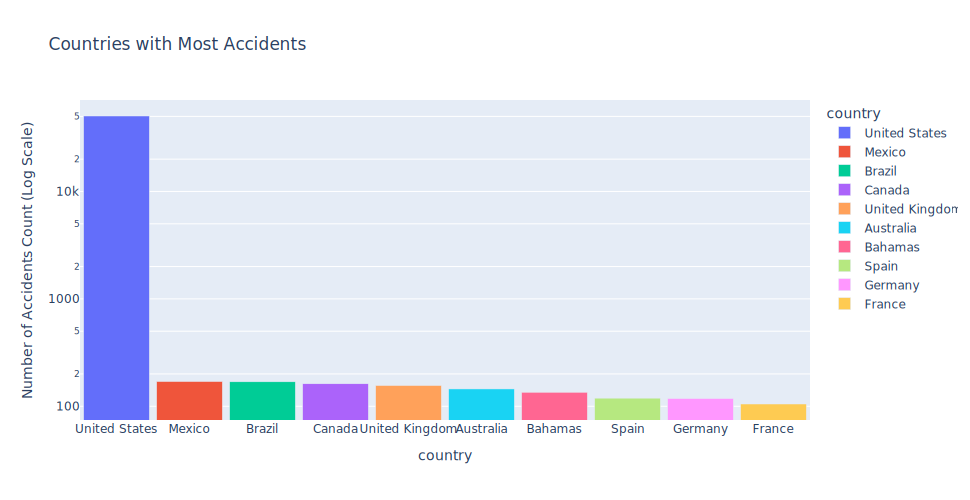

In [28]:
# Counts the occurrences of each unique value in the column
countries = df['country'].value_counts().reset_index(name="Number of accident")[:10]

# Plot bar graph 
fig = px.bar(countries, 
             x= 'country', 
             y = "Number of accident",
             title = 'Countries with Most Accidents', 
             color='country')

# Update layout. Using a log scale to fit teh scale  
fig.update_layout(
    width = 970,
    height = 500, 
    bargap = 0.1,
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Number of Accidents Count (Log Scale)'  
    )
)

fig.show()

#### Key observations 
- The chart illustrates the comparison of the number of accidents across different countries. It uses a log scale for the y-axis to better display the data.
- The chart shows that the United States has the highest number of accidents, with a much larger count than countries like Mexico, Brazil, Canada, and others.

## 2. Aircraft make with most accidents 
- Rank top 15 aircraft make with most accidents 

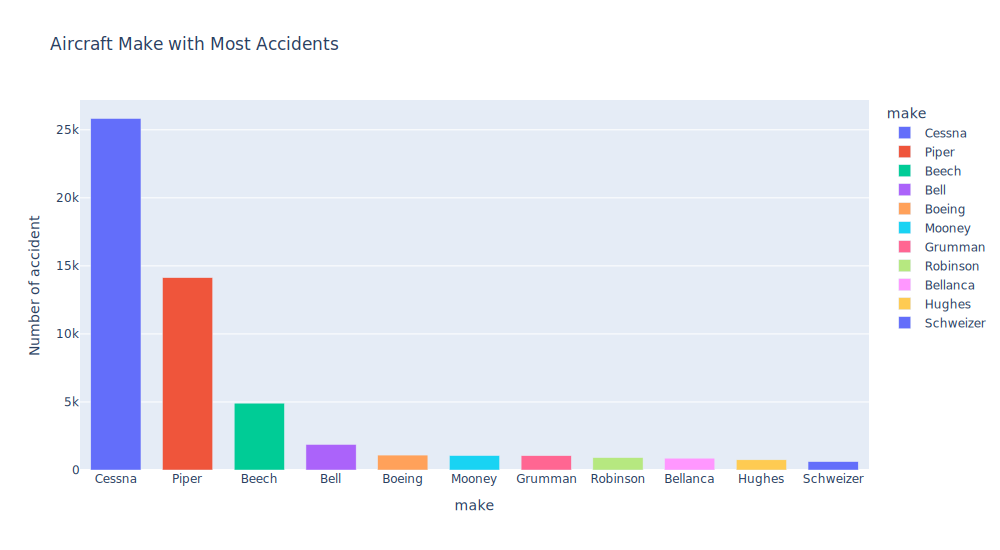

In [29]:
# Counts the occurrences of each unique value in the column
aircraft_make = df['make'].value_counts().reset_index(name="Number of accident")[:50]

# Plot bar graph 
fig = px.bar(aircraft_make, 
             x= 'make', 
             y = "Number of accident",
            title = 'Aircraft Make with Most Accidents', color= 'make',)

# Update layout 
fig.update_layout(
    width = 1000,
    height = 550, 
    bargap = 0.3
)
fig.show()

#### Key findings 
- The chart shows the number of accidents by aircraft make. 
- Cessna has by far the highest number of accidents, with over 25,000 reported incidents.
- Piper and Beech follow, but their accident counts are much lower compared to Cessna.
- Aircraft makes like Bell, Boeing, Mooney, and Grumman have significantly fewer accidents, each with less than 5,000 incidents.
- The other makes, such as Robinson, Bellanca, Hughes, and Schweizer, also show relatively low accident counts, suggesting that the majority of accidents are concentrated in a few makes.

## 3. Aircraft make model with most accidents 

- Rank top aircraft make-model with most accidents

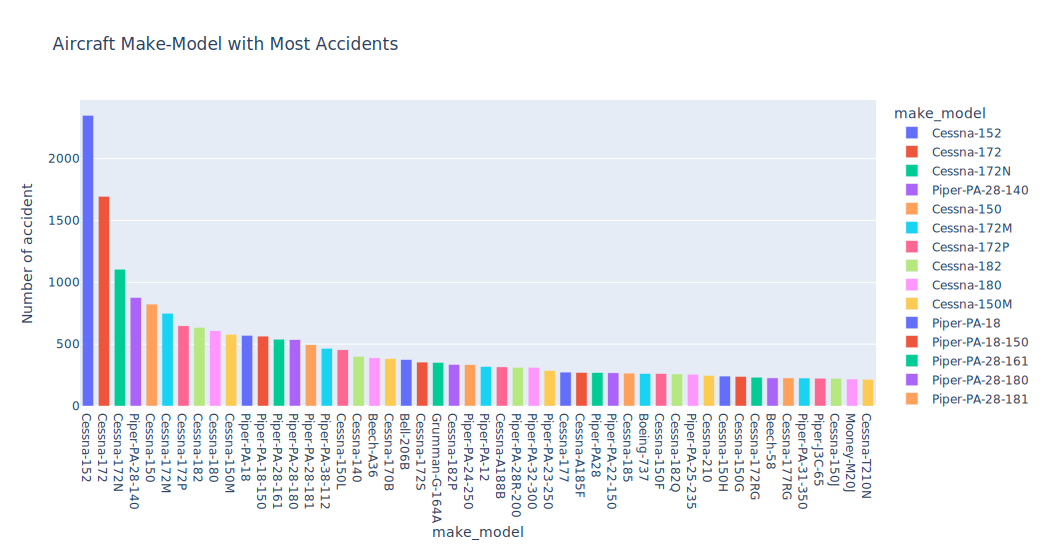

In [30]:
# Counts the occurrences of each unique value in the column
aircraft_make_model = df['make_model'].value_counts().reset_index(name="Number of accident")[:50]

# Plot bar graph 
fig = px.bar(aircraft_make_model, 
             x= 'make_model', 
             y = "Number of accident",
             title = 'Aircraft Make-Model with Most Accidents',
             color= 'make_model',)

# Update layout 
fig.update_layout(
    width = 1050,
    height = 550, 
    bargap = 0.3
)
fig.show()

**Key findings**

- Cessna 152 has the highest number of accidents, followed by Cessna 172 and Cessna 172N, each with over 1,000 incidents.
- There is a significant drop in the number of accidents for aircraft models beyond the top three, with many models like Piper PA-28-140, Cessna 180, and Cessna 172P showing accident counts in the hundreds.
- Aircraft models like Piper PA-28-150, Piper PA-18, and others in the middle to lower ranks show relatively fewer accidents compared to the top Cessna models.
- The chart indicates that certain Cessna and Piper models dominate the accident counts, with the remaining models spread more evenly across the lower range.

## 4. Phase of flight accidents 

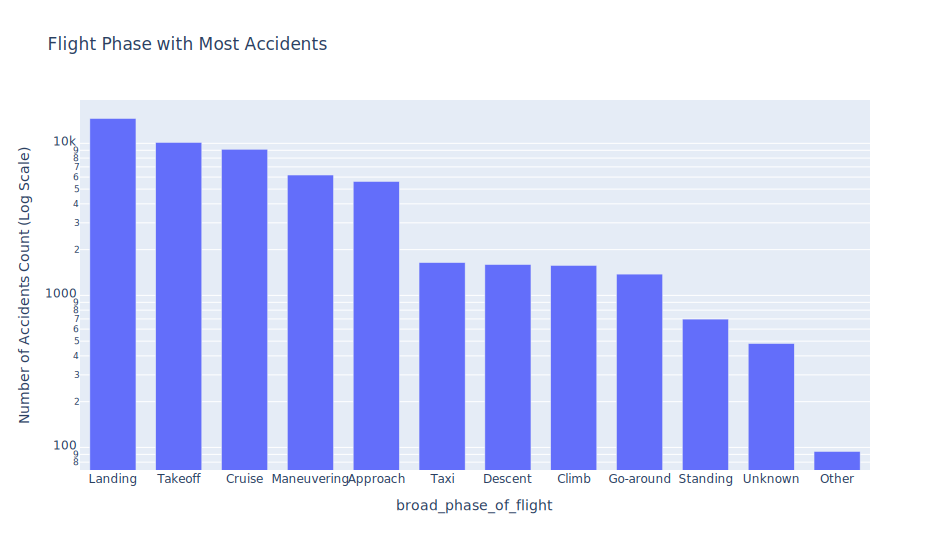

In [31]:
# Counts the occurrences of each unique value in the column
flight_phase = df['broad_phase_of_flight'].value_counts().reset_index(name="Number of accident")[:15]

# Plot bar graph 
fig = px.bar(flight_phase, 
             x= 'broad_phase_of_flight', 
             y = "Number of accident",
            title = 'Flight Phase with Most Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3,
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Number of Accidents Count (Log Scale)'  
    )
)
fig.show()

#### Key observations 

- The majority of accidents occur during the landing phase, accounting for the highest number of incidents, indicating this is the most critical flight phase for safety.

- Takeoff and cruise phases are the second and third most accident-prone, highlighting operational challenges during these stages.

- Maneuvering and Approach are significant but lower than landing, takeoff, and cruise.

- Lowest Incidence: Phases like taxi, descent, climb, go-around, standing, and "other" categories have the least number of accidents.

- Operational Focus: Safety measures should be prioritized for landing, takeoff, and cruise phases as they represent the highest risk.


## 5. Amature Built accidents 

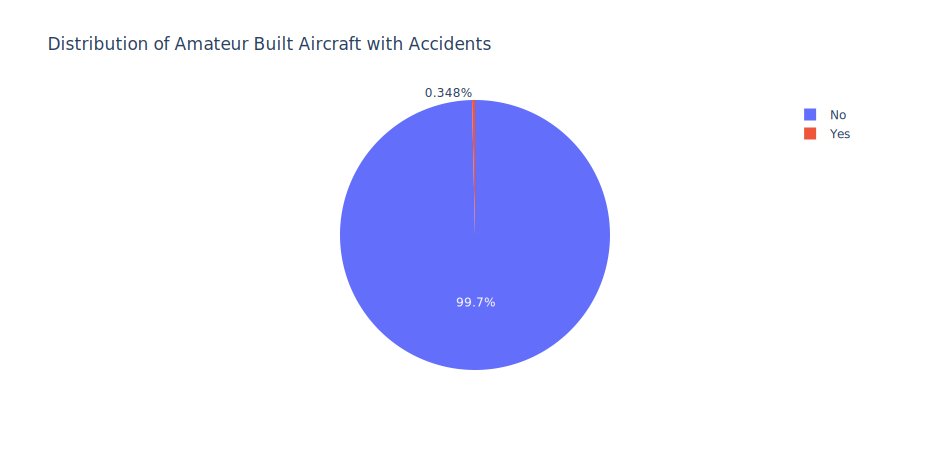

In [32]:
# Counts the occurrences of each unique value in the column
ameteur_built = df['amateur_built'].value_counts().reset_index(name="Number of accident")

# Plot bar graph 
fig = px.pie(ameteur_built, 
             names = 'amateur_built', 
             values = "Number of accident",
            title = 'Distribution of Amateur Built Aircraft with Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 450, 
    bargap = 0.3
)
fig.show()


#### Key Findings from the Chart:
- Low incidence of amateur-built accidents accounting for 0.348% of accidents involve amateur-built aircraft, indicating they are a very small fraction of overall incidents.

- Dominance of Non-Amateur Aircraft: The vast majority (99.7%) of accidents involve professionally manufactured or certified aircraft, underscoring their prevalence in aviation.

- Focus Areas: While amateur-built aircraft accidents are rare, their unique risks might still warrant specific safety considerations for builders and operators.

## 6. Weather conditions


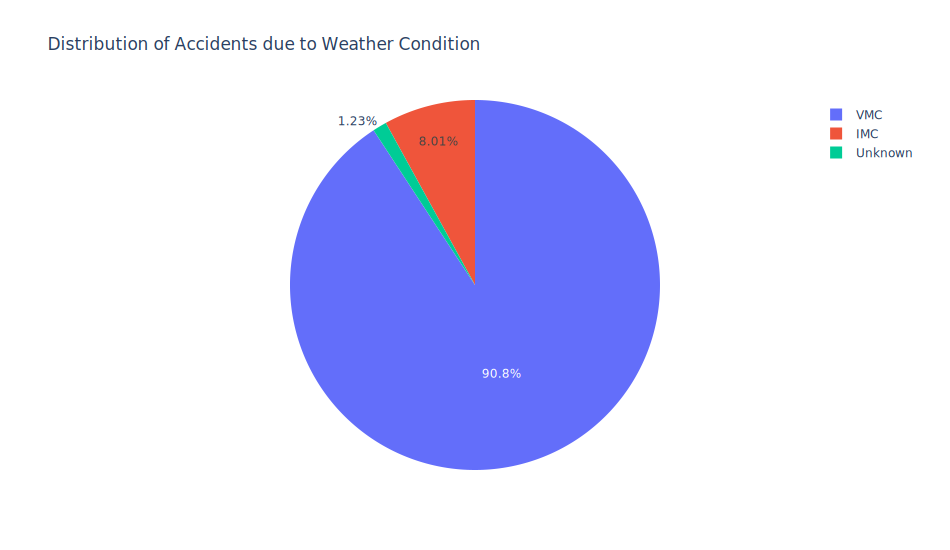

In [33]:
# Counts the occurrences of each unique value in the column
ameteur_built = df['weather_condition'].value_counts().reset_index(name="Number of accident")

# Plot bar graph 
fig = px.pie(ameteur_built, 
             names = 'weather_condition', 
             values = "Number of accident",
            title = 'Distribution of Accidents due to Weather Condition')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550,
)
fig.show()


### Key Findings from the Chart:
- Majority of Accidents in VMC: About 90.8% of accidents occur under Visual Meteorological Conditions (VMC), suggesting weather conditions are often not the primary cause.

- Lower Proportion in IMC: Only 8.01% of accidents happen in Instrument Meteorological Conditions (IMC), indicating adverse weather plays a relatively smaller role in accidents.

- Minimal Unknown Data: 1.23% of accidents have unknown weather conditions, showing good data completeness regarding weather-related factors.

### Engine types

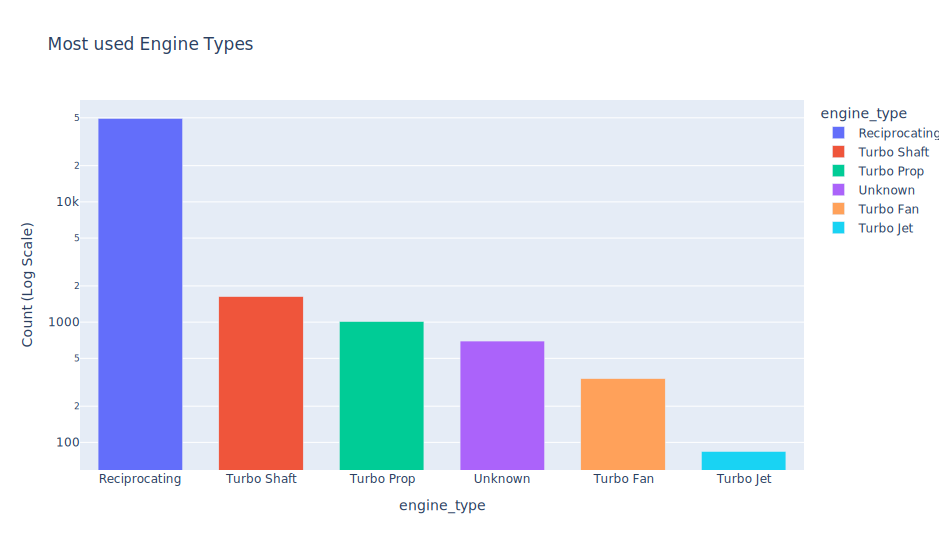

In [34]:

engine_types = df['engine_type'].value_counts().reset_index(name="Number of accident")[:10]

# Plot bar graph 
fig = px.bar(engine_types, 
             x= 'engine_type', 
             y = "Number of accident",
            title = 'Most used Engine Types',
            color = 'engine_type')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3,
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)
fig.show()

### Key findings 
- Reciprocating engines are by far the most common, with over 14,000 occurrences. This suggests that propeller-driven aircraft with reciprocating engines are the predominant engine type in the data.
- Turbo Shaft engines are the second most common, with around 1,800 occurrences. This engine type is commonly used in rotorcraft like helicopters.
- Turbo Prop engines are the third most common, with around 1,100 occurrences. These are turbine engines used to power propeller-driven aircraft.
- The remaining engine types - Unknown, Turbo Fan, and Turbo Jet - have significantly fewer occurrences, ranging from around 500 to 100.

### Seasons with most accidents 

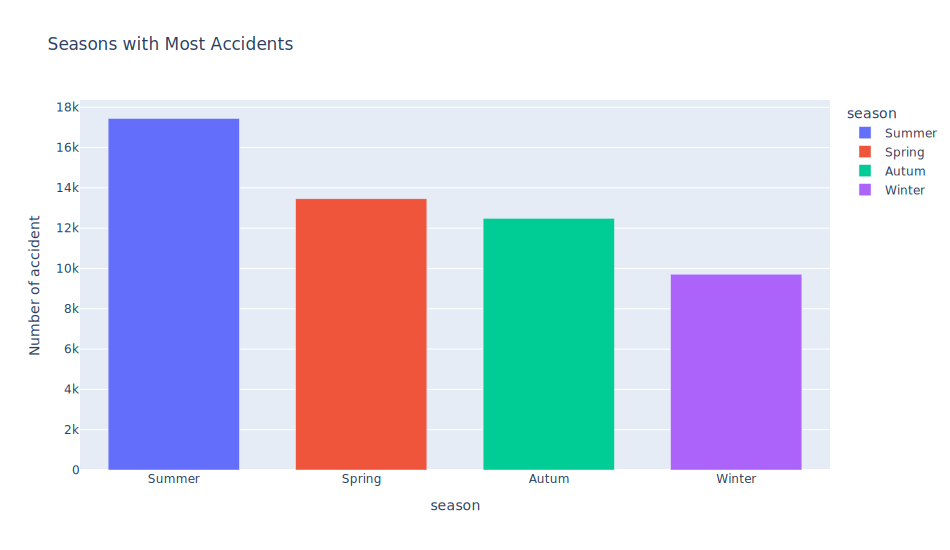

In [35]:
seasons = df['season'].value_counts().reset_index(name="Number of accident")[:6]

# Plot bar graph 
fig = px.bar(seasons, 
             x= 'season', 
             y = "Number of accident",
            title = 'Seasons with Most Accidents',
            color = 'season')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3
)
fig.show()

### Key findings 
- The summer season has the highest number of accidents, with over 17,000 occurrences. This is likely due to increased air traffic and flight activity during the summer months.
- The spring season has the second highest number of accidents, with around 14,500. Spring weather can be more unpredictable, which may contribute to the elevated accident rate.
- The autumn season has the third highest number of accidents, at around 12,500. This could be related to changes in weather patterns and lower visibility conditions during this time of year.
- The winter season has the lowest number of accidents, with just under 10,000 occurrences. Reduced flight operations and more stable weather conditions during the winter months may be factors in the lower accident rate.

### Exploring the purpose of flights involved in accidents

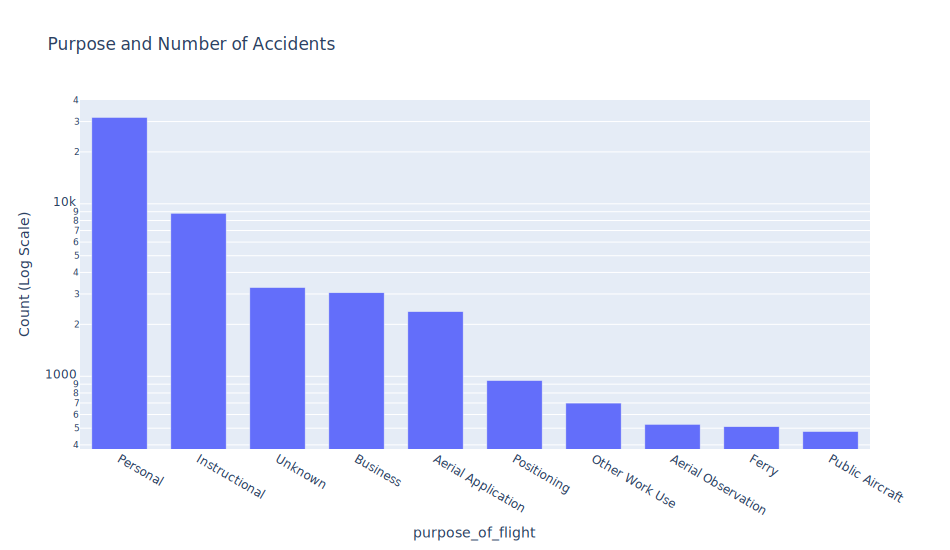

In [36]:
# Exploring the purpose of flights involved in accidents

top_10_purposes = df['purpose_of_flight'].value_counts().reset_index(name="Number of accident")[:10]

# Plot bar graph 
fig = px.bar(top_10_purposes, 
             x= 'purpose_of_flight', 
             y = "Number of accident",
            title = 'Purpose and Number of Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3,
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  
    )
)
fig.show()


plt.show()

### Key findings 
- The purpose with the most accidents is Personal, with over 14,000 occurrences. This suggests that private or recreational flights have a higher accident rate compared to other flight purposes.
- The second highest purpose is Instructional, with around 8,500 accidents. This could indicate that flight training and student pilot operations face significant safety challenges.
- The Unknown purpose category has the third highest number of accidents, at around 4,000. This uncertainty around the purpose of some flights is a potential safety concern that warrants further investigation.
- Business, Aerial Application, Positioning, Other Work Use, Aerial Observation, Ferry, and Public Aircraft - all have lower but still notable accident counts, ranging from around 2,000 to a few hundred.

# Bivariate Analysis 

## Injury severity index by aircraft. 
- Understanding injury severity variations by aircraft make is crucial for safety assessment and identifying makes that may need design improvements to lower injury risks.

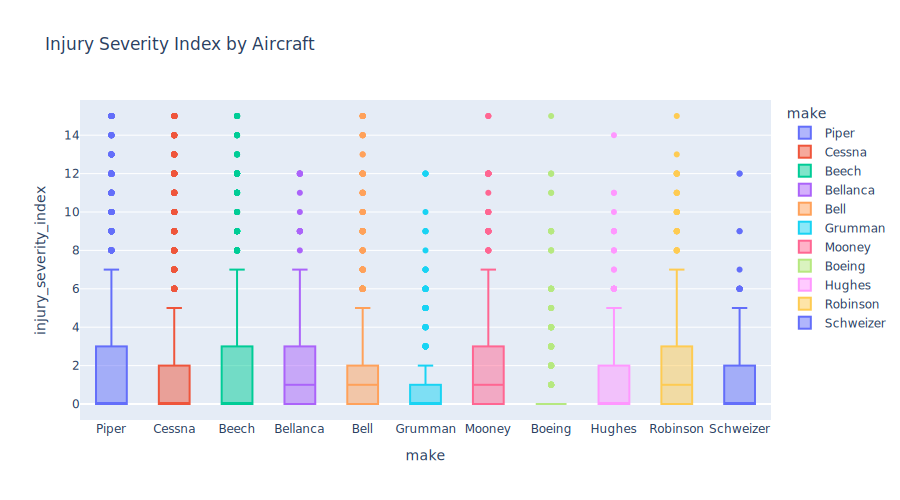

In [37]:
# Box plot comparing aircraft make and injury severity index

fig = px.box(
    df, 
    x='make', 
    y='injury_severity_index', 
    title='Injury Severity Index by Aircraft',
    color = 'make',
    width=900, 
    height=500
)
fig.show()


### Key observations 
**1. Variation in Injury Severity**

- Piper, Beech, Bellanca, and Cessna aircraft have a similar range of injury severity, with a maximum extending around 14.
- Grumman shows significantly lower variability, with a much smaller range compared to others.
- Robinson and Mooney has a notably high median injury severity compared to others, indicating frequent severe injuries for this make.
- Boeing has one of the lowest medians, indicating lower typical injury severity.
- Grumman and Hughes exhibit smaller interquartile ranges, implying more consistent injury severity values.

**2. Outliers**
- All aircraft types have outliers, suggesting occasional extreme injury severity cases.

## Aircraft damage severity index

- This analysis examines the relationship between aircraft make and the severity of damage incidents. It aims to identify whether certain aircraft manufacturers are associated with higher or lower levels of damage severity.

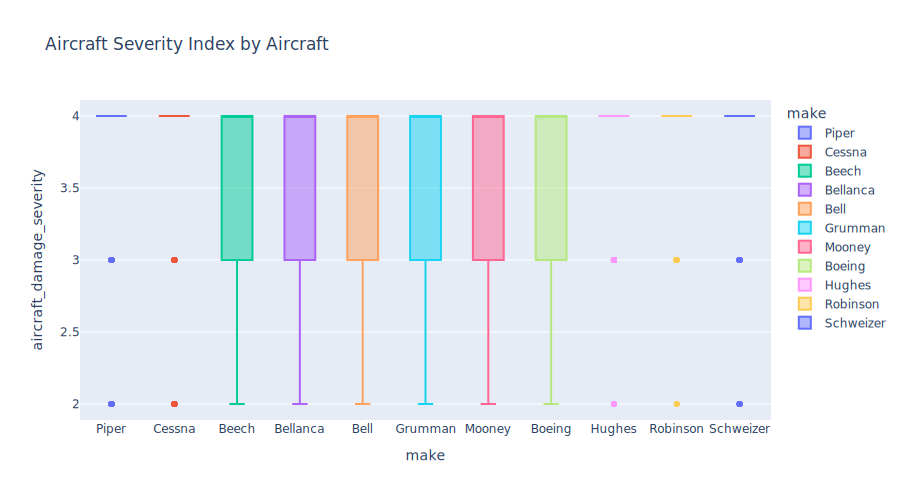

In [38]:
# Box plot comparing aircraft make and injury severity index

fig = px.box(
    df, 
    x='make', 
    y='aircraft_damage_severity', 
    title='Aircraft Severity Index by Aircraft',
    color = 'make',
    width=900, 
    height=500
)
fig.show()


### Key Findings:

**1. Narrow Range of Damage Severity**
- Most aircraft manufacturers show a consistent range of severity indices, typically centered around moderate levels of damage severity.
- Piper, Cessna, Robinson, and Schweizer show almost no variation, possibly indicating uniform damage behavior under incident conditions.
- Some makes, like Boeing and Mooney, exhibit higher variability, indicating a broader range of damage severities in incidents.
- Manufacturers like Cessna and Piper seem to cluster toward lower severity indices, suggesting they may be involved in less severe incidents.
- Certain makes, like Schweizer and Hughes, have fewer data points, which could limit the reliability of severity insights for these manufacturers.

# Uninjury severity

- This analysis compares the total number of uninjured individuals across different aircraft makes. The goal is to assess how the safety performance of various aircraft manufacturers relates to the survival outcomes of incidents.

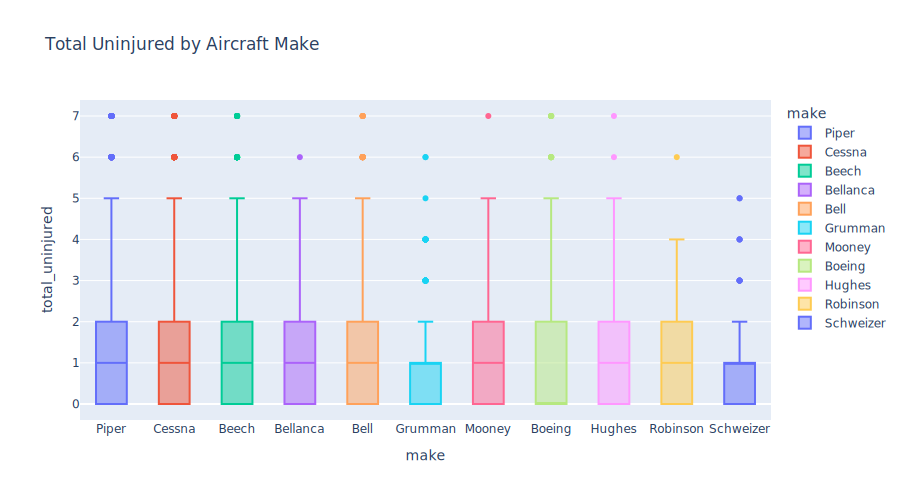

In [39]:
fig = px.box(
    df, 
    x='make', 
    y='total_uninjured', 
    title='Total Uninjured by Aircraft Make',
    color = 'make',
    width=900, 
    height=500
)
fig.show()


### Key Findings
- Most manufacturers show a similar median for uninjured individuals, indicating that safety outcomes are generally comparable across aircraft types.
- Aircraft makes like Bell, Mooney, and Boeing display wider ranges in the total uninjured, suggesting variability in incident outcomes for these manufacturers.
- Certain manufacturers, such as Schweizer, tend to cluster toward lower uninjured counts, which could indicate a lower capacity or different operational contexts leading to fewer uninjured outcomes.
- There are a few outlier points with consistently high numbers of uninjured individuals across multiple manufacturers, reflecting incidents with high survival rates.

## Fatality rate

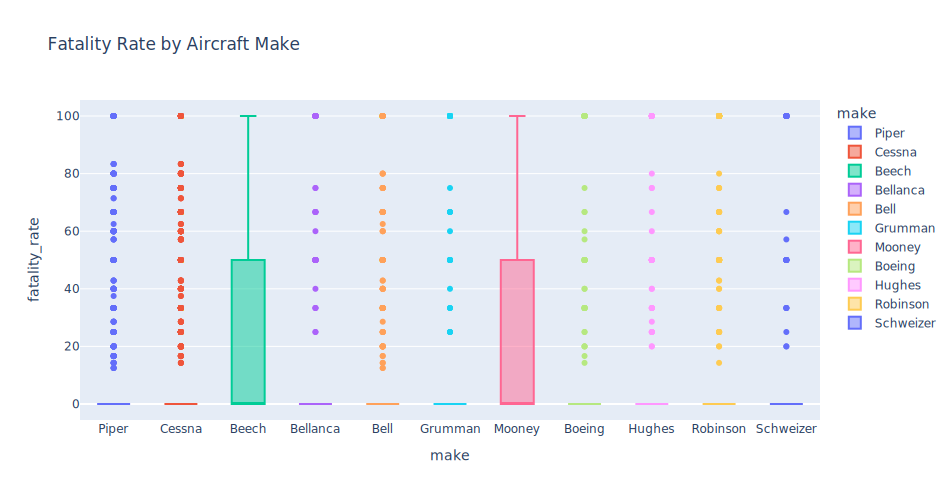

In [40]:
fig = px.box(
    df, 
    x='make', 
    y='fatality_rate', 
    title='Fatality Rate by Aircraft Make',
    color = 'make',
    width=950, 
    height=500
)
fig.show()


### Key Findings
- Aircraft from manufacturers like Beech and Mooney display significant variability in fatality rates, with some incidents reaching 100% fatalities. This indicates higher risk in certain situations or models.
- Manufacturers such as Piper, Cessna, and Schweizer show relatively low fatality rates across incidents, suggesting stronger safety records or operational contexts that minimize fatalities.
- High fatality rates in certain makes (e.g., Beech and Mooney) could reflect extreme events or specific vulnerabilities, warranting further investigation into these cases.

## Survival rate
- This analysis uses a box plot to compare the survival rates by aircraft make, providing insights into potential differences in safety or design effectiveness among various manufacturers.

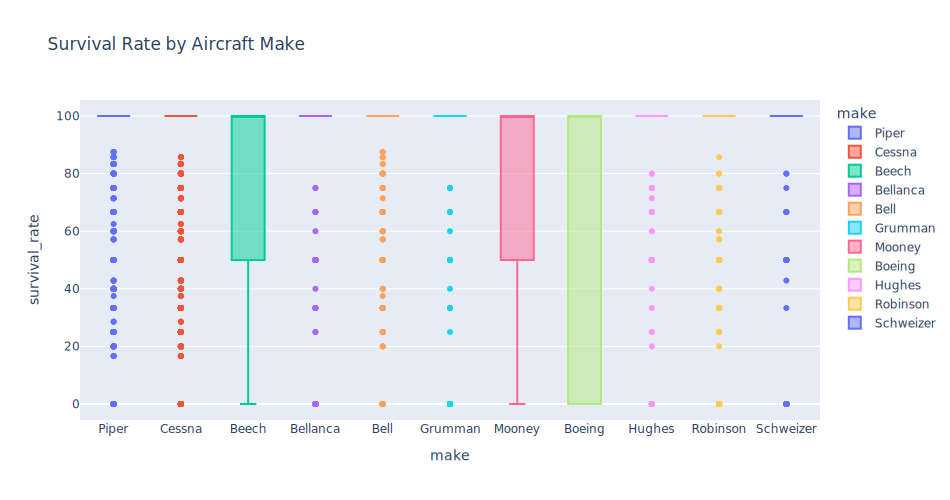

In [41]:
fig = px.box(
    df, 
    x='make', 
    y='survival_rate', 
    title='Survival Rate by Aircraft Make',
    color = 'make',
    width=950, 
    height=500
)
fig.show()


### Key Findings:
- Beech and Mooney aircraft exhibit a wide range in survival rates, as indicated by their large interquartile range (IQR).
- Boeing shows high survival rates with a relatively narrow range, implying more consistent outcomes.
- Some aircraft types, such as those from Beech, have outliers showing very low survival rates.
- Mooney shows high variability, but with a tendency toward higher survival outcomes.
- Manufacturers like Cessna and Piper demonstrate smaller variability in survival rates, suggesting more uniform performance outcomes.

### Aircraft vs Engine 
- Compare the most used engine type for most aricrafts 
- This analysis evaluates the most commonly used engine types across various aircraft manufacturers to understand preferences, trends, or patterns in engine selection.
- It can provide insights into the dominance of certain engine technologies and their association with specific manufacturers.

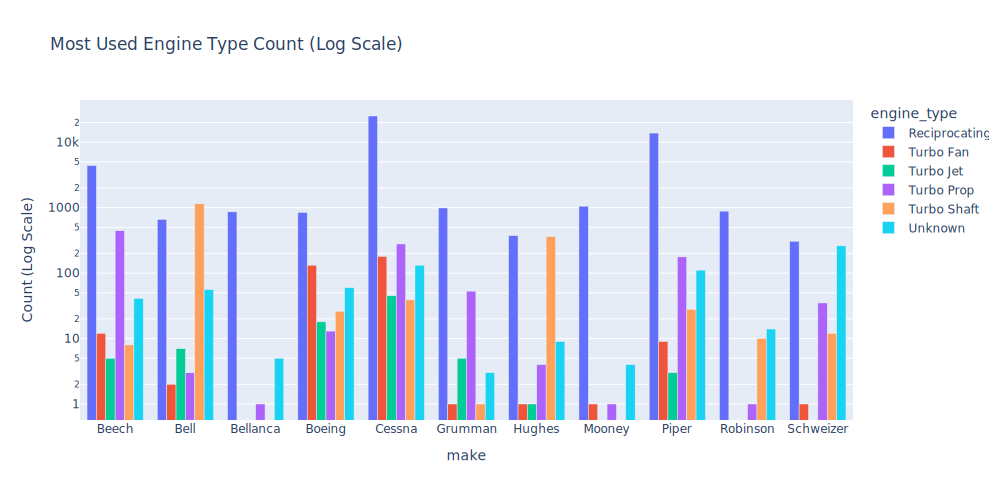

In [42]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['engine_type']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='engine_type', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='engine_type',
    barmode='group',
    title='Most Used Engine Type Count (Log Scale)', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)


# Show the figure
fig.show()

### Key Findings:
- Reciprocating engines are the most widely used engine type across multiple manufacturers, including Beech, Cessna, Piper, and Robinson. Their counts significantly surpass other engine types, reflecting their popularity for smaller or general aviation aircraft.
- Boeing primarily uses Turbo Fan engines, which aligns with their focus on large commercial jetliners.
- Bell, Hughes, and Schweizer show a significant presence of Turbo Shaft engines, typical for helicopters.
- Turbo Jet engines have limited use across manufacturers.
- Turbo Prop engines have moderate use, mainly visible for manufacturers like Beech and Cessna.
- Some manufacturers (e.g., Schweizer) show a notable count of unknown engine types, indicating incomplete data or less common configurations.

## Aircraft vs Purpose 
- This analysisprovides valuable insights into the target markets and applications for various aircraft manufacturers. It describes the diverse ways aircraft are being utilized across the industry.


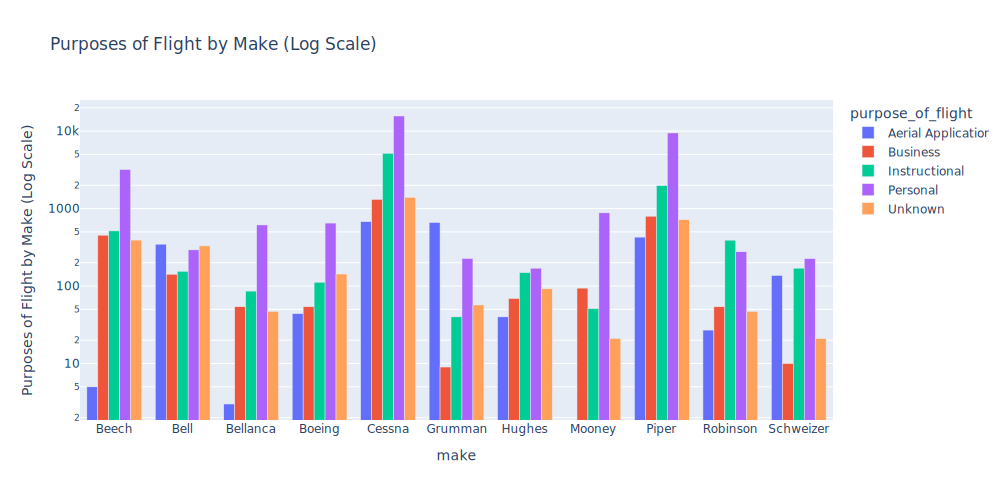

In [43]:

# Get the top 10 most frequent purposes
top_purposes = df['purpose_of_flight'].value_counts().head(5).index

# Filter the DataFrame to include only the top purposes
filtered_df = df[df['purpose_of_flight'].isin(top_purposes)]

# Create the crosstab
cross_tab = pd.crosstab(filtered_df['make'], filtered_df['purpose_of_flight']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='purpose_of_flight', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='purpose_of_flight',
    barmode='group',
    title='Purposes of Flight by Make (Log Scale)',
    width=1000,
    height=500
)

# Optionally use a logarithmic scale for the y-axis
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title=' Purposes of Flight by Make (Log Scale)'  # Optional: add a title for clarity
    )
)

# Show the figure
fig.show()


### Key findings 

- There is significant variation in use cases across manufactures. Different aircraft cater to a wide range of purposes, from Aerial Application to Business, Instructional, and Personal use. T
- Manufacturers, such as Bell, and Piper, have a strong focus on Aerial Application, indicating these aircraft are widely used for agricultural, surveying, and other specialized aerial work.
- Across most manufacturers, Business and Personal use cases emerge as prominent applications, suggesting a robust demand for private and commercial transportation services.
- The presence of an "Unknown" category points to the need for further investigation into certain flight purposes that are not easily categorized, providing an opportunity to better understand the full scope of how aircraft are being utilized.

## Make and Amature builts 
- This analysis comparing the amateur-built status of aircraft by manufacturer provides valuable insights into potential safety considerations.

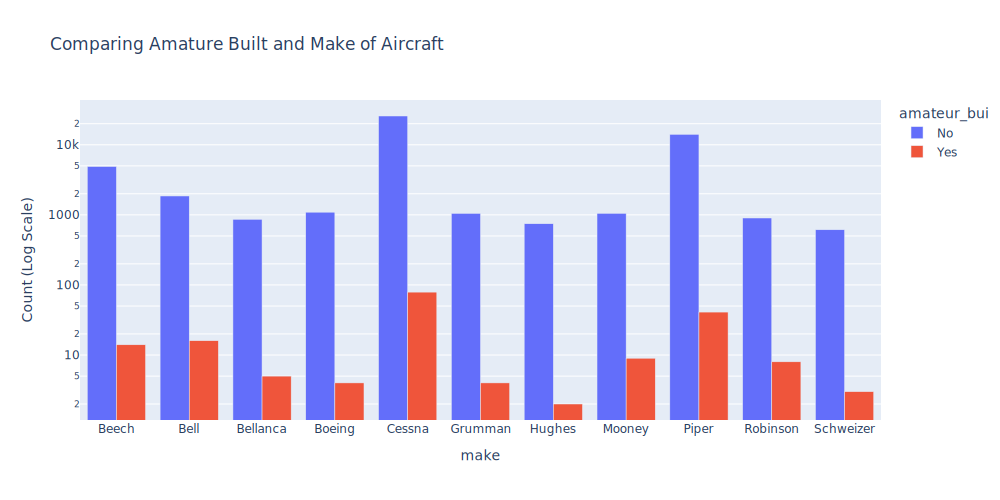

In [44]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['amateur_built']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='amateur_built', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='amateur_built',
    barmode='group',
    title='Comparing Amature Built and Make of Aircraft', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)


# Show the figure
fig.show()

### Key Findings 

- Analysis shows that some manufacturers, such as Boieng, Hughes, Schweizer have a higher proportion of aircraft that are not amateur-built, while others, like Piper, Cessna, and Robinson, have a greater share of amateur-built aircraft.
- The variation in amateur-built ratios across manufacturers indicates that some companies may be more specialized in either producing aircraft for the amateur market or focusing on commercial/professional-grade models.

## Make and weather 
- This analysis comparing aircraft manufacturers and the number of accidents they experience due to poor weather conditions 

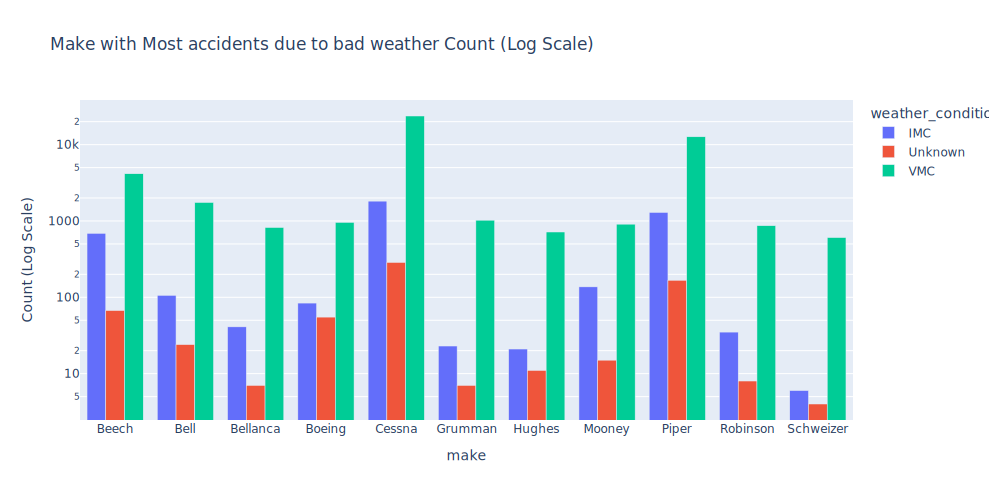

In [45]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['weather_condition']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='weather_condition', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='weather_condition',
    barmode='group',
    title='Make with Most accidents due to bad weather Count (Log Scale)', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)


# Show the figure
fig.show()

### Key findings

- The chart shows that certain manufacturers, such as Cessna and Piper experience a much higher number of weather-related accidents. This suggests that some aircraft models or designs may be more susceptible to poor weather conditions.
- For many manufacturers (Instrument Meteorological Conditions), the majority of weather-related accidents are attributed to IMC, which indicates that pilots encountering low visibility, clouds, or other challenging instrument conditions are at a higher risk of incidents.
- For VMC (Visual Meteorological Conditions), while less prevalent than IMC accidents, some manufacturers such as Cessna and Piper still experience a notable number of weather-related incidents even in visual flight conditions. This implies that factors beyond just instrument flying, such as aircraft handling or pilot decision-making, may also play a role in these accidents.
- The presence of an "Unknown" category for some manufacturers suggests that there may be gaps in data collection or reporting, where the specific weather conditions contributing to the accidents are not clearly identified.

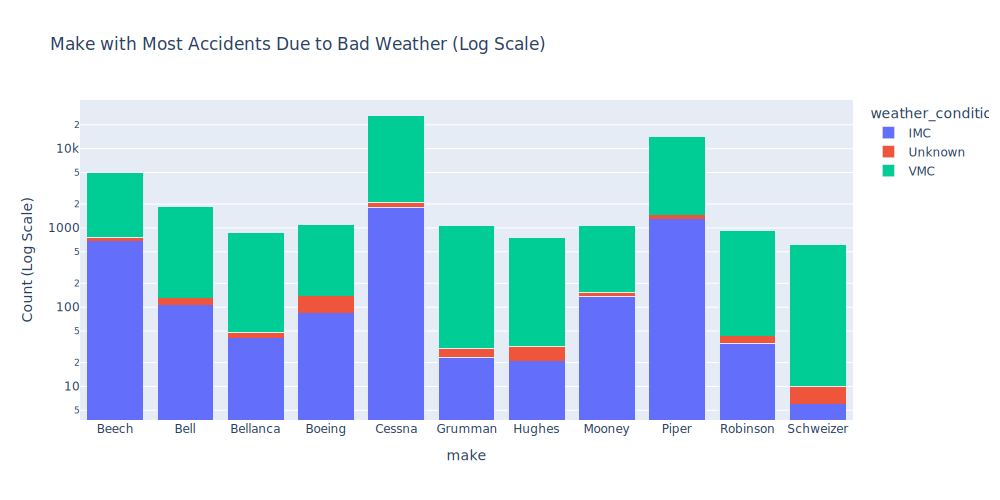

In [46]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['weather_condition']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='weather_condition', value_name='count')


# Create the bar chart (stacked)
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='weather_condition',
    barmode='stack',  # Change to 'stack' for stacked bar chart
    title='Make with Most Accidents Due to Bad Weather (Log Scale)', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)

# Show the figure
fig.show()


### Key findings

- The chart shows substantial differences in the number of weather-related accidents experienced by various manufacturers. Some, like Cessna and Piper have a much higher incidence of accidents due to poor weather conditions compared to others, such as Robinson and Schweizer.
- For many manufacturers, a large proportion of the weather-related accidents are attributed to IMC (Instrument Meteorological Conditions), suggesting that pilots encountering low visibility, cloud cover, or other challenging instrument conditions are at a higher risk of incidents.
- For VMC (Visual Meteorological Conditions), while less prevalent than IMC accidents, some manufacturers still experience a notable number of weather-related incidents even in visual flight conditions. This implies that factors beyond just instrument flying, such as aircraft handling or pilot decision-making, may also contribute to these accidents.
- The presence of an "Unknown" category for some manufacturers indicates that there may be gaps in data collection or reporting, where the specific weather conditions contributing to the accidents are not clearly identified.



## Make and Broad phase of flight

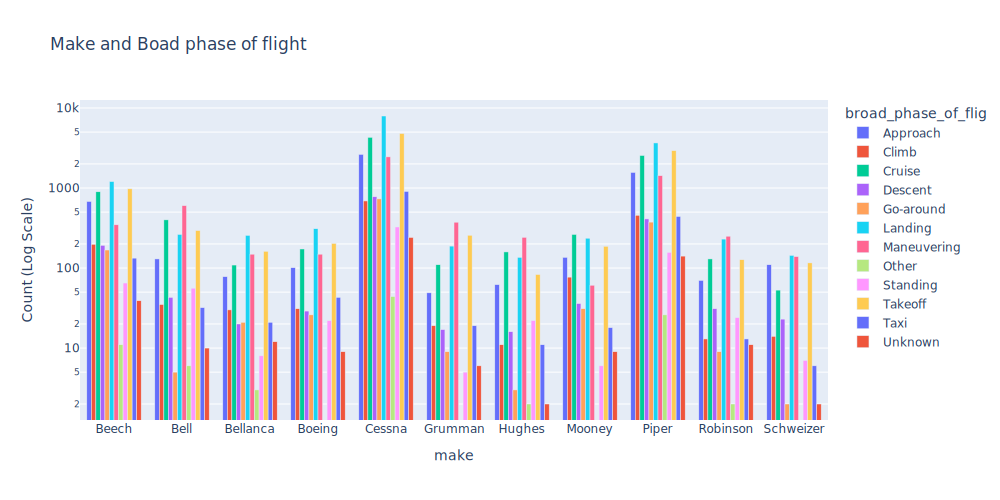

In [47]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['broad_phase_of_flight']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='broad_phase_of_flight', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='broad_phase_of_flight',
    barmode='group',
    title='Make and Boad phase of flight', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)


# Show the figure
fig.show()

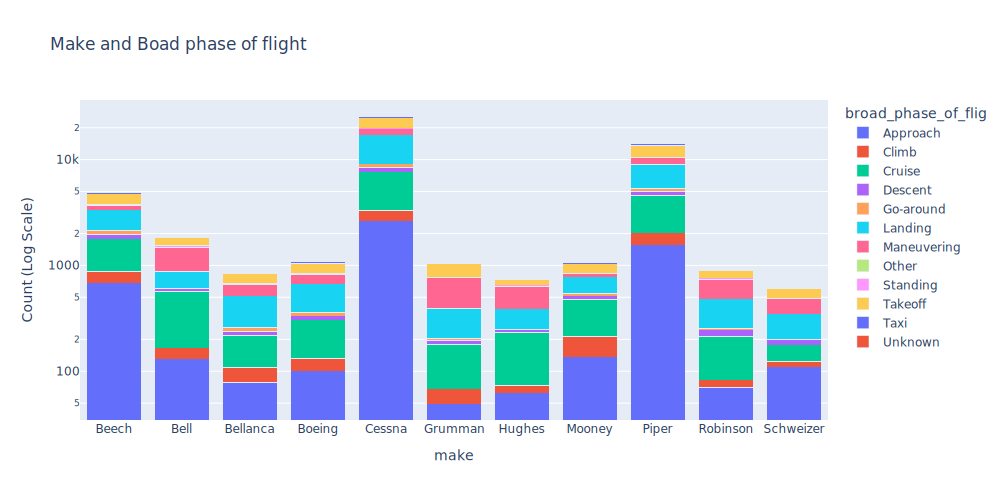

In [48]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['broad_phase_of_flight']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='broad_phase_of_flight', value_name='count')

# # Create the bar chart
# fig = px.bar(
#     cross_tab_melted,
#     x='make',
#     y='count',
#     color='broad_phase_of_flight',
#     barmode='group',
#     title='Make and Boad phase of flight', 
#     width=1000, 
#     height=500
# )
# fig.update_layout(
#     yaxis=dict(
#         type='log',  # Set the y-axis to logarithmic scale
#         title='Count (Log Scale)'  # Optional: add a title for clarity
#     )
# )


# # Show the figure
# fig.show()

# Create the bar chart (stacked)
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='broad_phase_of_flight',
    barmode='stack',  # Change to 'stack' for stacked bar chart
    title='Make and Boad phase of flight', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)

# Show the figure
fig.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53104 entries, 1 to 88888
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   event_id                  53104 non-null  object        
 1   investigation_type        53104 non-null  object        
 2   accident_number           53104 non-null  object        
 3   event_date                53104 non-null  datetime64[ns]
 4   country                   53104 non-null  object        
 5   aircraft_damage           53104 non-null  object        
 6   make                      53104 non-null  object        
 7   model                     53104 non-null  object        
 8   amateur_built             53104 non-null  object        
 9   number_of_engines         53104 non-null  float64       
 10  engine_type               53104 non-null  object        
 11  purpose_of_flight         53104 non-null  object        
 12  total_fatal_injuries   

# Multivariate Analysis 

In [50]:
df.head()

event_id investigation_type accident_number event_date  \
1  20001218X45447           Accident      LAX94LA336 1962-07-19   
2  20061025X01555           Accident      NYC07LA005 1974-08-30   
4  20041105X01764           Accident      CHI79FA064 1979-08-02   
6  20001218X45446           Accident      CHI81LA106 1981-08-01   
7  20020909X01562           Accident      SEA82DA022 1982-01-01   

         country aircraft_damage    make     model amateur_built  \
1  United States       Destroyed   Piper  PA24-180            No   
2  United States       Destroyed  Cessna      172M            No   
4  United States       Destroyed  Cessna       501            No   
6  United States       Destroyed  Cessna       180            No   
7  United States     Substantial  Cessna       140            No   

   number_of_engines    engine_type purpose_of_flight  total_fatal_injuries  \
1                1.0  Reciprocating          Personal                   4.0   
2                1.0  Reciprocating          Personal                   3.0   
4                1.0  Reciprocating          Personal                   1.0   
6                1.0  Reciprocating          Personal                   4.0   
7                1.0  Reciprocating          Personal                   0.0   

   total_serious_injuries  total_minor_injuries  total_uninjured  \
1                     0.0                   0.0              0.0   
2                     0.0                   1.0              1.0   
4                     2.0                   0.0              0.0   
6                     0.0                   0.0              0.0   
7                     0.0                   0.0              2.0   

  weather_condition broad_phase_of_flight      make_model  season  \
1           Unknown               Unknown  Piper-PA24-180  Summer   
2               IMC                Cruise     Cessna-172M  Summer   
4               VMC              Approach      Cessna-501  Summer   
6               IMC               Unknown      Cessna-180  Summer   
7               VMC               Takeoff      Cessna-140  Winter   

   aircraft_damage_severity  injury_severity_index  total_people_involved  \
1                         3                   12.0                    4.0   
2                         3                   10.0                    5.0   
4                         3                    7.0                    3.0   
6                         3                   12.0                    4.0   
7                         4                    0.0                    2.0   

   fatality_rate  total_survivors  survival_rate  
1     100.000000              0.0       0.000000  
2      60.000000              2.0      40.000000  
4      33.333333              2.0      66.666667  
6     100.000000              0.0       0.000000  
7       0.000000              2.0     100.000000

In [51]:
### aircraft_damage_severity + injury_severity_index + broad_phase_of_flight

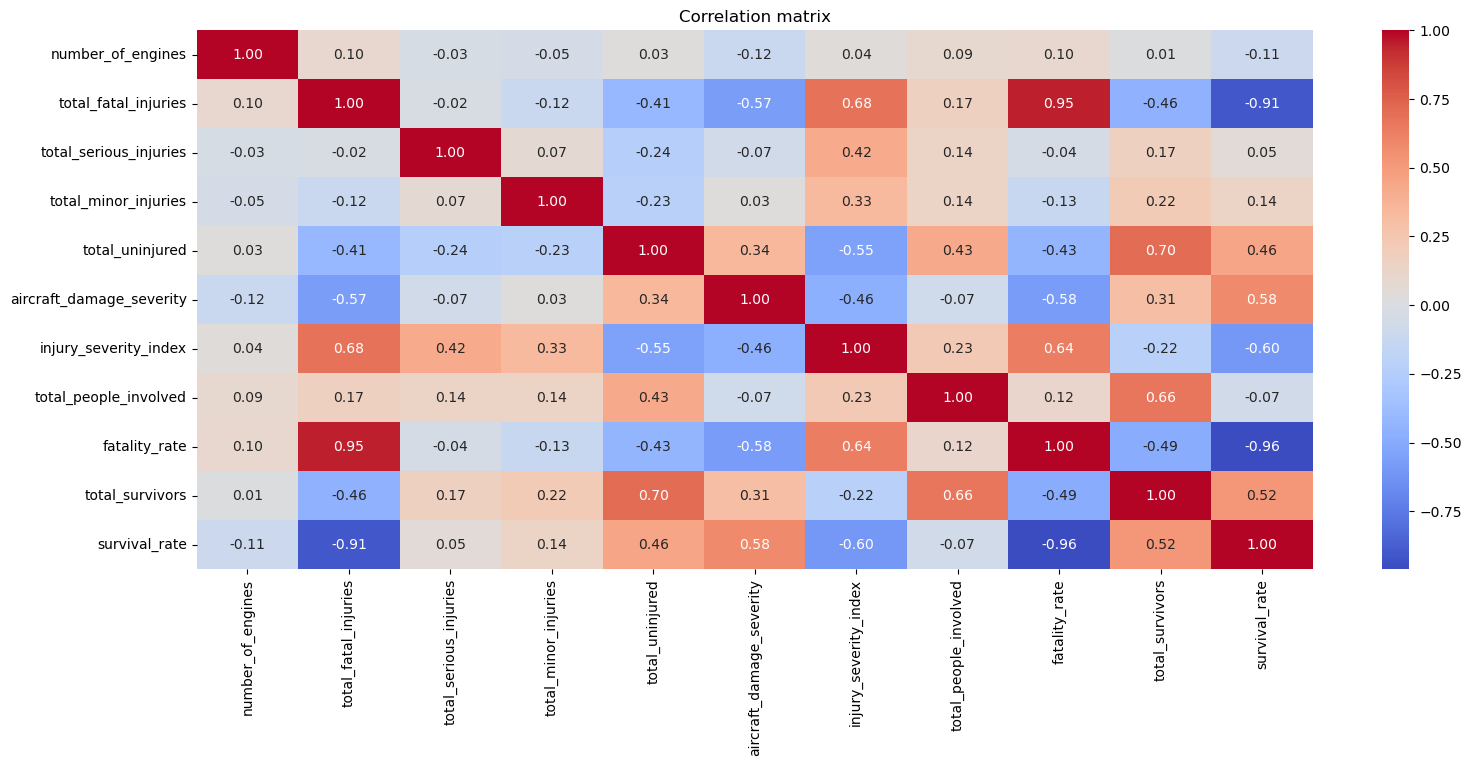

In [52]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix 
corr_matrix = df[numeric_columns].corr(method='kendall')

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# Time series analysis 

### Trends in number of accidents over time 

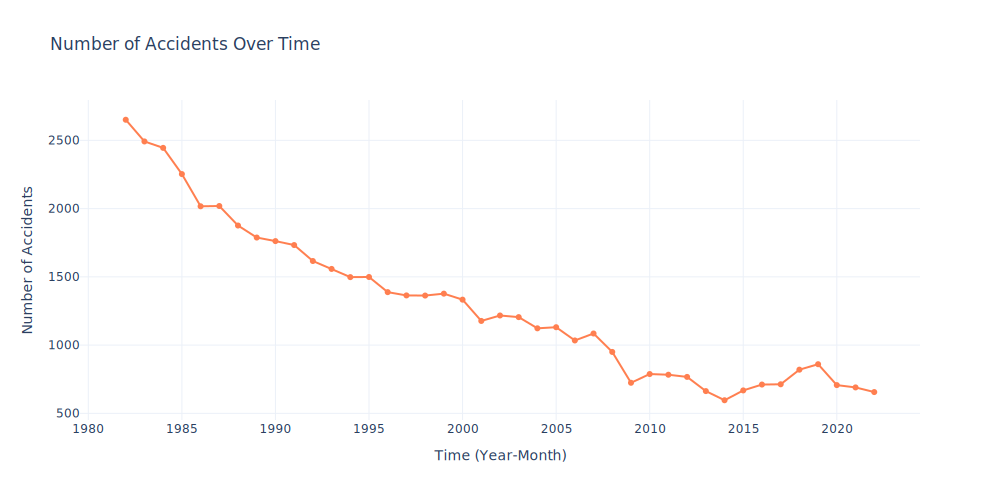

In [53]:

# Convert event_date to datetime format
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Extract year for additional analysis
df['year'] = df['event_date'].dt.year

# Filter for dates from 1982 onwards
filtered_data = df[df['event_date'] >= '1982-01-01']

# Aggregate by year to calculate the number of accidents
yearly_trend = filtered_data.groupby(filtered_data['event_date'].dt.to_period('Y'))['event_id'].count()

# Reset index to use for plotting
yearly_trend = yearly_trend.reset_index()
yearly_trend['event_date'] = yearly_trend['event_date'].dt.to_timestamp()

# Plot using Plotly Express
fig = px.line(
    yearly_trend,
    yearly_trend['event_date'], 
    yearly_trend['event_id'],
    title='Number of Accidents Over Time',
    markers=True,
    width=1000, 
    height=500
)

#Customize layout
fig.update_traces(line_color='coral')
fig.update_layout(
    xaxis_title='Time (Year-Month)',
    yaxis_title='Number of Accidents',
    template='plotly_white'
)

# Show the plot
fig.show()


### Key Observations 
- The number of aviation accidents has significantly decreased since the 1980s, reflecting advancements in aviation safety measures, technology, and regulations.
- While the decline is prominent, the trend appears to stabilize after 2010, with minor fluctuations around 2020. This could suggest diminishing returns on safety interventions or newer challenges emerging.
- The steep decline in the early years suggests major safety transformations during the 1980s and 1990s, likely due to enhanced safety practices and stricter industry regulations.

## Year over year analysis 
- Year-over-year (YoY) analysis of aviation accidents helps track short-term variations and detect patterns or anomalies that might not be visible in long-term trends. It highlights sudden spikes or reductions, resulting from  policy changes, economic conditions, or external factors (e.g., global crises).

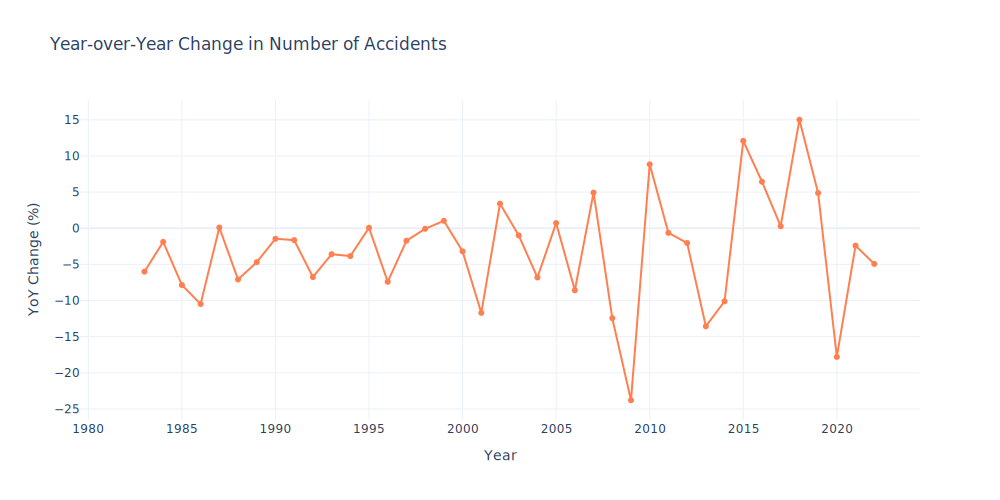

In [54]:
# Convert event_date to datetime format
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Filter for dates from 1982 onwards
filtered_data = df[df['event_date'] >= '1982-01-01']

# Aggregate by year to calculate the number of accidents
yearly_trend = (
    filtered_data.groupby(filtered_data['event_date'].dt.year)
    .size()
    .reset_index(name='number_of_accidents')
)

# Rename the first column to 'year'
yearly_trend.rename(columns={'event_date': 'year'}, inplace=True)

# Calculate YoY percentage change
yearly_trend['yoy_change'] = yearly_trend['number_of_accidents'].pct_change() * 100

# Plot using Plotly Express
fig = px.line(
    yearly_trend,
    x='year', 
    y='yoy_change',
    title='Year-over-Year Change in Number of Accidents',
    markers=True,
    width=1000, 
    height=500
)

# Customize layout
fig.update_traces(line_color='coral')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='YoY Change (%)',
    template='plotly_white'
)

# Show the plot
fig.show()


### Key Observations
- The YoY changes are highly variable, with some years showing significant increases or decreases. This indicates the influence of external or temporary factors on accident rates.
- Notable sharp declines (e.g., early 2000s and 2020) may coincide with major regulatory changes, technological advances, or reductions in air traffic.
- Despite some positive spikes, there is no consistent pattern of YoY increases, reinforcing the overall downward trend observed in the first chart.
- The YoY changes appear more pronounced after 2010, suggesting that while accidents are declining overall, certain factors may cause short-term volatility.



### Yearly Fatality Rate
- The analysis of fatality rates provides a measure of the severity of aviation accidents over time. While the number of accidents is declining, examining fatality rates highlights how safety measures are impacting the outcomes of these incidents.

16.21745828491083


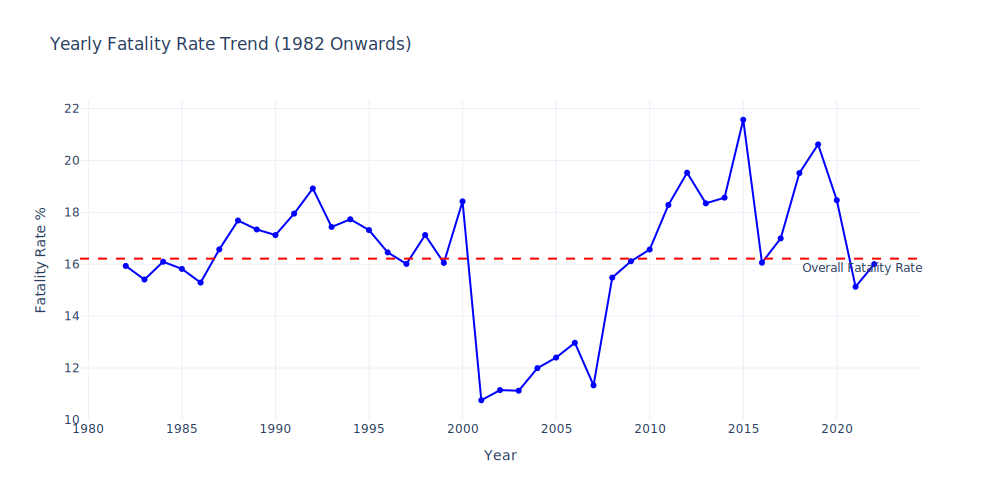

In [55]:
# Calculate overall fatality rate (average across all events)
overall_fatality_rate = df['fatality_rate'].mean()

print(overall_fatality_rate)

# Calculate yearly average fatality rate
fatality_trend = df[df['event_date'] >= '1982-01-01'].groupby(df['event_date'].dt.to_period('Y')).agg(
    fatality_rate=('fatality_rate', 'mean')
).reset_index()

# Convert period to timestamp for plotting
fatality_trend['event_date'] = fatality_trend['event_date'].dt.to_timestamp()

fig = px.line(
    fatality_trend,
    x='event_date',
    y='fatality_rate',
    title='Yearly Fatality Rate Trend (1982 Onwards)',
    markers=True,
    width=1000,
    height=500
)

# Add a horizontal line for the overall fatality rate
fig.add_hline(
    y=overall_fatality_rate,
    line_dash="dash",
    line_color="red",
    annotation_text="Overall Fatality Rate",
    annotation_position="bottom right"
)

# Customize layout
fig.update_traces(line_color='blue')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Fatality Rate %',
    template='plotly_white'
)

# Show the plot
fig.show()


### Key observations 

- The fatality rate shows considerable variation over the years, oscillating around the overall average of 16.2%.
- Notable declines in the early 2000s indicate years where accidents were less severe, potentially due to improved safety protocols, better emergency responses, or changes in aircraft design.
- Increases after 2010 (e.g., spikes near 2015 and 2020) could reflect accidents involving larger aircraft or events with higher casualty rates, despite fewer total accidents.
- While fluctuating, the fatality rate has not drastically declined, indicating that while accidents have become less frequent, mitigating fatalities in those accidents remains a challenge.


### Fatality Rate by aircraft make
- This analysis is critical for identifying safety trends in aviation, helping manufacturers, regulators, and pilots focus on areas for improvement to reduce accident fatality rates.


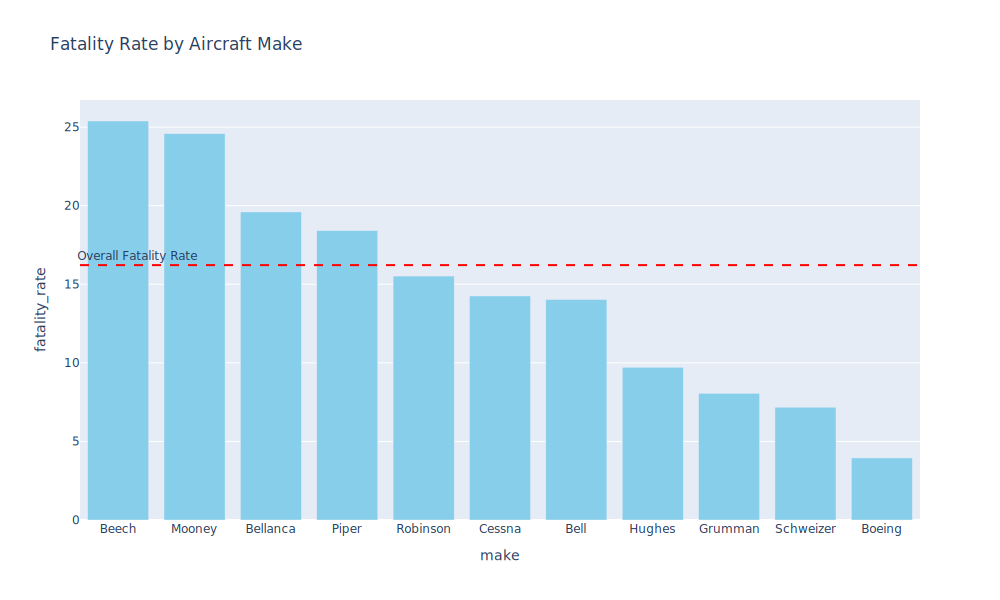

In [56]:
import plotly.express as px
import plotly.graph_objects as go

# Group by 'make' and calculate the average fatality rate
fatality_by_make = df.groupby('make')['fatality_rate'].mean().reset_index()

# Sort values by fatality rate for better visualization
fatality_by_make = fatality_by_make.sort_values(by='fatality_rate', ascending=False)

# Calculate the overall fatality rate
overall_fatality_rate = df['fatality_rate'].mean()

# Create the bar chart with Plotly Express
fig = px.bar(
    fatality_by_make,
    x='make',
    y='fatality_rate',
    title='Fatality Rate by Aircraft Make',
    labels={'Fatality_Rate': 'Fatality Rate (Average)', 'Make': 'Aircraft Make'},
    color_discrete_sequence=['skyblue'],
    height=600,
    width=1000
)

# Add the horizontal line for the overall fatality rate
fig.add_hline(
    y=overall_fatality_rate,
    line_dash='dash',
    line_color='red',
    annotation_text='Overall Fatality Rate',
    annotation_position='top left'
)

# # Update layout for readability
# fig.update_layout(
#     xaxis=dict(title='Aircraft Make'),
#     yaxis=dict(title='Fatality Rate (Average)'),
#     bargap=0.2,
#     template='plotly_white'
# )

# Show the plot
fig.show()


### Key Observations
- Beech and Mooney aircraft have the highest fatality rates, exceeding 25%, which is notably above the overall fatality rate (marked by the red dashed line).
- Boeing exhibits the lowest fatality rate among the listed manufacturers, significantly below the overall average.
- The rates for Bellanca, Piper, are also above average, while Cessna, Bell, and others remain closer to or below the benchmark.


### Accident frequencies for different aircraft makes 

- This analysis is important for understanding how accident frequencies have evolved over time for different aircraft manufacturers. It helps identify trends, assess the effectiveness of safety measures, and guide future aviation policies.


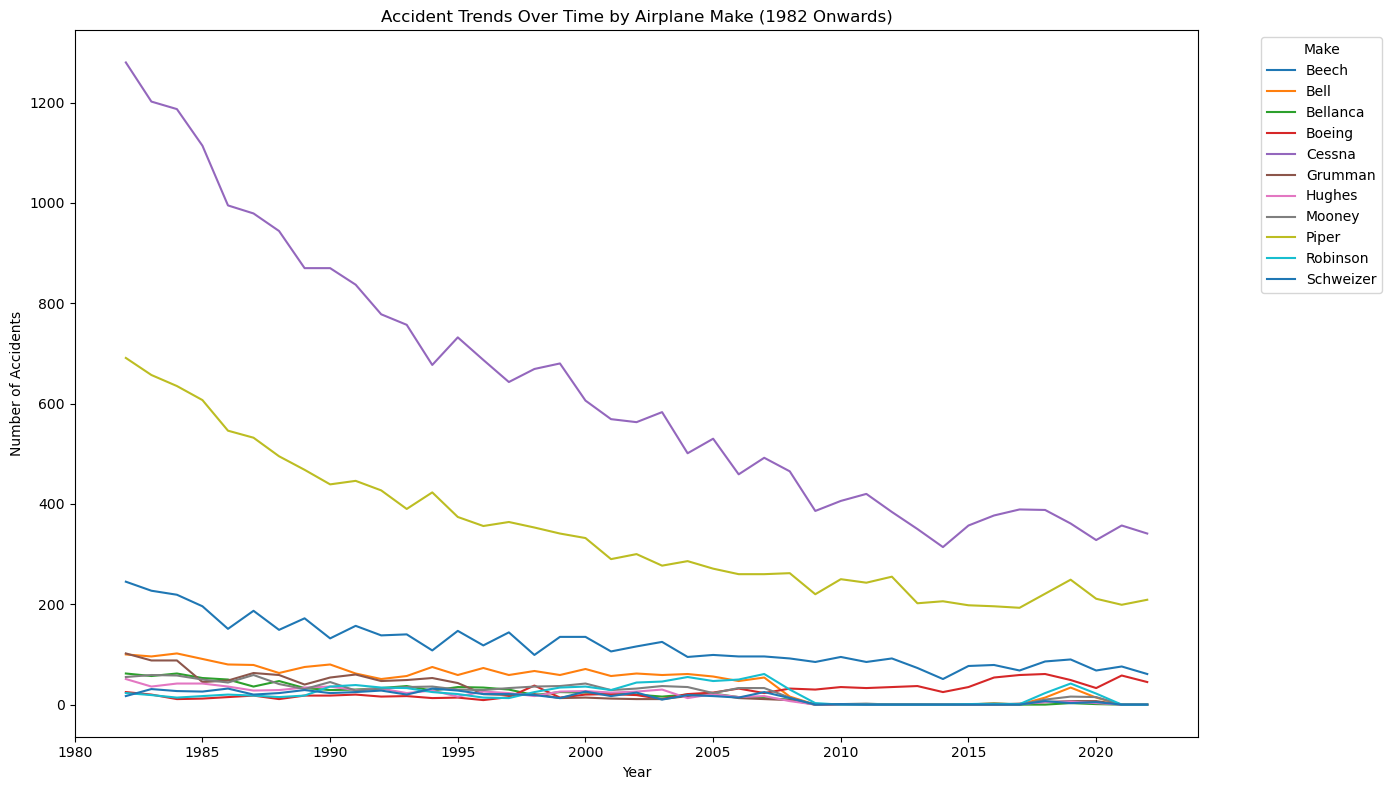

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure event_date is in datetime format
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Extract year for trend analysis
df['year'] = df['event_date'].dt.year

# Filter data for years from 1982 onwards
df_filtered = df[df['year'] >= 1982]

# Group data by make and year, counting the number of accidents
trend_data = df_filtered.groupby(['make', 'year'])['event_id'].count().reset_index()

# Pivot the data to get years as rows and makes as columns
trend_pivot = trend_data.pivot(index='year', columns='make', values='event_id').fillna(0)

# Plot the trends
plt.figure(figsize=(14, 8))
for make in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[make], label=make)

# Add titles and labels
plt.title('Accident Trends Over Time by Airplane Make (1982 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Key Observations
- Cessna: Shows a steep decline in accidents from 1982 onward, dropping from over 1,200 annual accidents to fewer than 200 by 2020. This reflects significant improvements in safety or reduced usage.
- Piper: Similarly exhibits a decline, though less pronounced than Cessna's. Accidents dropped from about 600 to fewer than 100 over the same period.
- Beech: Starts at a lower accident count compared to Cessna and Piper but also shows a consistent reduction, from around 200 to nearly negligible levels by 2020.


In [58]:
# Assuming `df` is your cleaned DataFrame
file_path = "/home/western/Documents/Data/aviation_data.csv"  # Replace with your desired file name and path

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to /home/western/Documents/Data/aviation_data.csv


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53104 entries, 1 to 88888
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   event_id                  53104 non-null  object        
 1   investigation_type        53104 non-null  object        
 2   accident_number           53104 non-null  object        
 3   event_date                53104 non-null  datetime64[ns]
 4   country                   53104 non-null  object        
 5   aircraft_damage           53104 non-null  object        
 6   make                      53104 non-null  object        
 7   model                     53104 non-null  object        
 8   amateur_built             53104 non-null  object        
 9   number_of_engines         53104 non-null  float64       
 10  engine_type               53104 non-null  object        
 11  purpose_of_flight         53104 non-null  object        
 12  total_fatal_injuries   

In [60]:
df.describe()

event_date  number_of_engines  total_fatal_injuries  \
count                          53104       53104.000000          53104.000000   
mean   1997-08-26 09:13:17.228080768           1.116093              0.356037   
min              1962-07-19 00:00:00           0.000000              0.000000   
25%              1987-09-05 00:00:00           1.000000              0.000000   
50%              1995-07-23 00:00:00           1.000000              0.000000   
75%              2005-12-11 06:00:00           1.000000              0.000000   
max              2022-12-29 00:00:00           3.000000              5.000000   
std                              NaN           0.339240              0.864939   

       total_serious_injuries  total_minor_injuries  total_uninjured  \
count            53104.000000          53104.000000     53104.000000   
mean                 0.173094              0.228401         1.240848   
min                  0.000000              0.000000         0.000000   
25%                  0.000000              0.000000         0.000000   
50%                  0.000000              0.000000         1.000000   
75%                  0.000000              0.000000         2.000000   
max                  2.000000              2.000000         7.000000   
std                  0.466712              0.527651         1.247301   

       aircraft_damage_severity  injury_severity_index  total_people_involved  \
count              53104.000000           53104.000000           53104.000000   
mean                   3.749247               1.642701               1.998381   
min                    2.000000               0.000000               0.000000   
25%                    4.000000               0.000000               1.000000   
50%                    4.000000               0.000000               2.000000   
75%                    4.000000               2.000000               2.000000   
max                    4.000000              15.000000               8.000000   
std                    0.475468               2.728052               1.211771   

       fatality_rate  total_survivors  survival_rate          year  
count   53104.000000     53104.000000   53104.000000  53104.000000  
mean       16.217458         1.642343      82.654566   1997.148614  
min         0.000000         0.000000       0.000000   1962.000000  
25%         0.000000         1.000000     100.000000   1987.000000  
50%         0.000000         1.000000     100.000000   1995.000000  
75%         0.000000         2.000000     100.000000   2005.000000  
max       100.000000         8.000000     100.000000   2022.000000  
std        35.248633         1.253359      36.296101     11.432062